## INFO ABOUT EXCEL FILES


-  archivo_agrupado3.1  : Contains the info grouped by grade and station number. Final version

- output and output expanded: The phrases and words were grouped by the LLM having into acount similarity in new categories for further analysis. There is a count of words and phrases to create a report using PowerBI

# INTRODUCTION

Some weeks ago I started this notebook because my mother needed help with some surveys in her school. She was struggling with the analysis of the collected information. First, I asked the type of surveys she did, to my surprise they were physical surveys and had a graphcal format. They were not proper surveys, they were more like a tree of problems diagram (Problem analysys). The answers were handwritten.

That was a problem, mostly because it was going to be a challenge to get meaningful information without having to transcript each survey one by one. I decided to use a LLM to tackle this challenge. At the beginning I came up with the following flow

Upload the image + get the transcription + use the LLM capabilities to summarize the info + get the most repeated words per category + create a report for stakeholders

ChatGPT did not allow me to implement this workflow due to limitations on the API. Besides, I did not have the premium plan.

I decided to explore other LLMs. Gemini looked like the perfect fir, even more when I realized that they offered a free trial. It included the most important capabilities which was enough for me.

I suscribed and copied this notebook tutorial to start the project




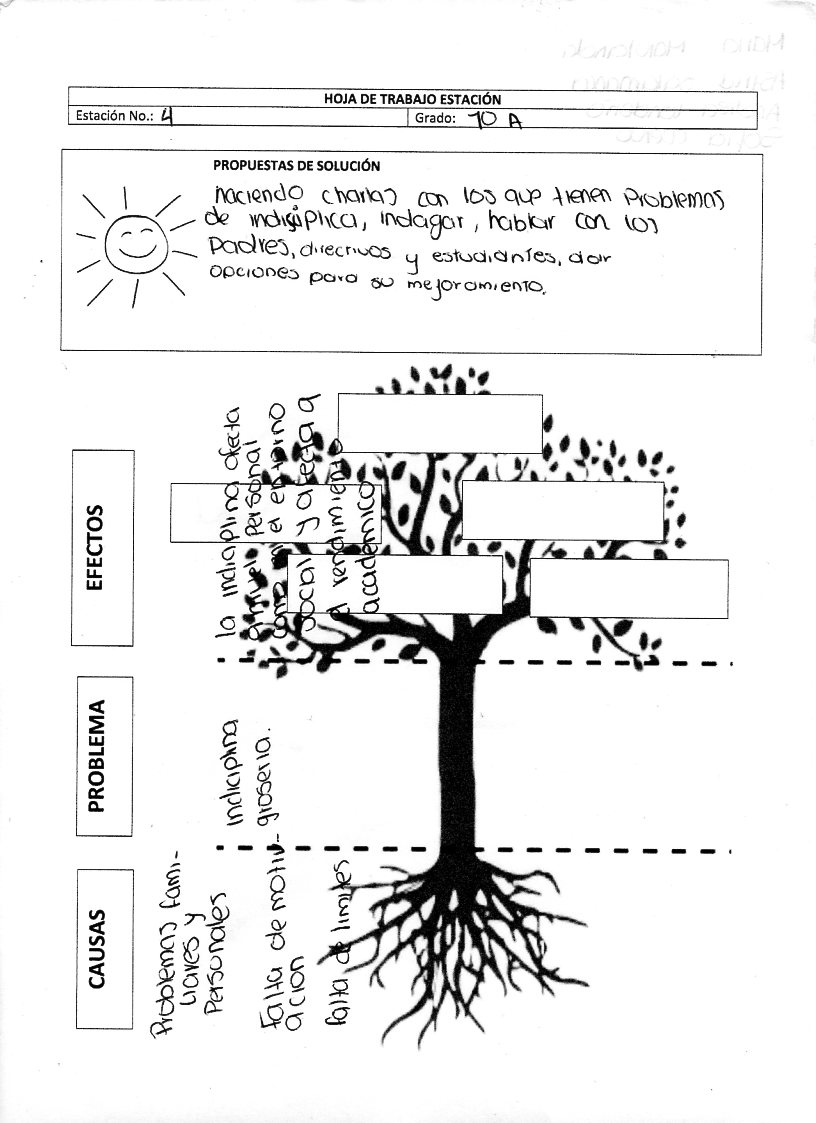

This is one of the surveys after scanning

It was clear that we had to extract:
- Station Number
- Grade
- Solution proposal
- Causes
- Problem
- Consequences

There were some challenges as well, how to handle the text over the diagram of the tree or when it is rotated. In fact, the decision of using Gemini was the last resort after using OCR and other LLMS. Here is an account of this learning journey. I know there are a lot of mistakes and inadequacies.

# Gemini API Python quickstart and transcription

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/tutorials/quickstart_colab"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This tutorial shows you how to get started with the Gemini API using the Python SDK.

## Prerequisites

You can run this tutorial in Google Colab, which doesn't require additional environment configuration.

Alternatively, to complete this quickstart locally, see the Python guidance in [Get started with the Gemini API](https://ai.google.dev/tutorials/quickstart).

## Install the SDK

The Python SDK for the Gemini API is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [ ]:
!pip install -q -U google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.0/760.0 kB 15.3 MB/s eta 0:00:00


In [ ]:
from IPython.display import Markdown

## Set up your API key

To use the Gemini API, you'll need an API key. If you don't already have one, create a key in Google AI Studio.

<a class="button" href="https://aistudio.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`. Then pass the key to the SDK:

In [ ]:
# Import the Python SDK
import google.generativeai as genai
# Used to securely store your API key
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Initialize the Generative Model

Before you can make any API calls, you need to initialize the Generative Model.

In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro-001')

In [ ]:
# Check the configuration of the model
model

genai.GenerativeModel(
    model_name='models/gemini-1.5-pro-002',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

## Generate text

In [ ]:
#Load source file, this the csv obtained after transcription
import pandas as pd
input_csv= '/content/archivo_agrupado3.1.xlsx'
df = pd.read_excel(input_csv)
df.head()

,Grade,Category,PROPUESTAS DE SOLUCION_frases,CAUSAS_frases,PROBLEMA_frases,EFECTOS_frases
0,6,Ausentismo,"['pedir copia al profesor', 'desahogarse', 'no...","['enfermedad', 'no entrar por pereza', 'confli...","['ausentismo', 'acostarse tarde', 'encontrarse...","['quedarse atrasado', 'no saber como hacer las..."
1,6,Indisciplina,"['mas responsabilidad de los padres', 'poner a...","['apodos', 'hacer ruido en clase', 'regale a m...","['indisciplina escolar', 'indisciplina', 'prop...","['anotaciones en el observador', 'no prestar a..."
2,6,Metodologias de enseñanza y evaluacion,['prestar atencion a los profesores cuando nos...,"['no prestar atencion a los profesores', 'habl...","['metodologia y evaluacion utilizada', 'metodo...","['no repasar para los examenes', 'cuando no no..."
3,7,Ausentismo,"['desatrasarse', 'pedir explicaciones', 'habla...","['enfermedad', 'cita medica', 'por la tarde', ...","['ausentismo', 'ausentismo', 'ausentismo', 'au...","['pierde el año', 'pierde la atencion de los p..."
4,7,Falta de apoyo de la familia,"['poder tener el apoyo, tanto de madre y padre...","['irresponsabilidad', 'cumplimiento', 'honesti...","['el apoyo familiar', 'falta de apoyo familiar...","['baja actitud hacia la escuela', 'trabajo de ..."


In [ ]:
texto=df['PROPUESTAS DE SOLUCION_frases'].iloc[0]

In [ ]:
texto

"['pedir copia al profesor', 'desahogarse', 'no quemarse mas', 'hablar con los papas de la situacion para', 'conocer una solucion', 'con los hijos para no quedarse atras', 'colocar un despertador', 'y', 'dormir temprano', 'no ausentarse mas', 'acostarse temprano', 'realizar mis tareas', 'entender los temas vistos en clase', 'no perder materias', 'no perder clases', 'por la explicacion', 'traer las tareas', 'poner cuidado en la clase', 'ser mas ordenado', 'hacer las tareas', 'ser mas ordenado', 'prestar mas atencion', 'hablar con los padres', 'space for solution proposals', 'the image shows a tree diagram']"

In [ ]:
# Creating categories

import pandas as pd
from google.generativeai.types import HarmCategory, HarmBlockThreshold
response = model.generate_content(f"Clasifica los elementos de la siguiente lista en categorias de acuerdo a su significado, elimina frases sin sentido o completa frases incompletas si es posible de acuerdo al contexto. Retorna unicamente un diccionario que se llame categorias con categorias y frases asociadas. No incluyas esto en la respuesta # Frase completada según el contexto {texto}", safety_settings={
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,}
        )
Markdown(">" + response.text)
print(response.text)

```python
categorias = {
  'Manejo del tiempo': ['colocar un despertador', 'dormir temprano', 'acostarse temprano', 'ser mas ordenado'],
  'Rendimiento académico': ['realizar mis tareas', 'entender los temas vistos en clase', 'no perder materias', 'no perder clases', 'traer las tareas', 'poner cuidado en la clase', 'hacer las tareas', 'prestar mas atencion'],
  'Comunicación': ['pedir copia al profesor', 'hablar con los papas de la situacion para', 'hablar con los padres', 'por la explicacion'],
  'Metas personales': ['no quemarse mas', 'conocer una solucion', 'ser mas ordenado'],
  'Frases incompletas': ['con los hijos para no quedarse atras'],
  'Frases sin sentido': ['desahogarse', 'y', 'space for solution proposals', 'the image shows a tree diagram']
}
```



In [ ]:
texto=response.text

In [ ]:
texto

"```python\ncategorias = {\n  'Manejo del tiempo': ['colocar un despertador', 'dormir temprano', 'acostarse temprano', 'realizar mis tareas'],\n  'Rendimiento académico': ['entender los temas vistos en clase', 'no perder materias', 'no perder clases', 'traer las tareas', 'poner cuidado en la clase', 'hacer las tareas', 'prestar más atención'],\n  'Comunicación': ['pedir copia al profesor', 'hablar con los padres de la situación para conocer una solución', 'hablar con los padres', 'por la explicación'],\n  'Bienestar emocional': ['desahogarse', 'no quemarse más'],\n  'Organización': ['ser más ordenado', 'ser más ordenado'], \n  'Frases incompletas': ['con los hijos para no quedarse atrás']\n}\n``` \n"

In [ ]:
texto_limpio = texto.replace('```python', '').replace('```', '').strip()
texto_limpio = texto_limpio.replace('# Frase completada según el contexto', '').strip()
#print(texto_limpio)
exec(texto_limpio)
# Ahora el diccionario 'categorias' debería estar disponible
#print(categorias)


In [ ]:
categorias

{'Manejo del tiempo': ['colocar un despertador',
  'dormir temprano',
  'acostarse temprano',
  'realizar mis tareas'],
 'Rendimiento académico': ['entender los temas vistos en clase',
  'no perder materias',
  'no perder clases',
  'traer las tareas',
  'poner cuidado en la clase',
  'hacer las tareas',
  'prestar más atención'],
 'Comunicación': ['pedir copia al profesor',
  'hablar con los padres de la situación para conocer una solución',
  'hablar con los padres',
  'por la explicación'],
 'Bienestar emocional': ['desahogarse', 'no quemarse más'],
 'Organización': ['ser más ordenado', 'ser más ordenado'],
 'Frases incompletas': ['con los hijos para no quedarse atrás']}

In [ ]:
# Count the number of phrases in each category
new_dict = {key: len(value) for key, value in categorias.items()}

# Imprimir el nuevo diccionario
print(new_dict)

{'Manejo del tiempo': 4, 'Rendimiento académico': 7, 'Comunicación': 4, 'Bienestar emocional': 2, 'Organización': 2, 'Frases incompletas': 1}


In [ ]:
import pandas as pd
import time  # Para agregar el delay
from google.generativeai.types import HarmCategory, HarmBlockThreshold

# Función para procesar las columnas con la API y mantener un diccionario general
def procesar_columnas_con_api(df):

    # Definir las columnas a procesar
    columnas_a_procesar = ['PROPUESTAS DE SOLUCION_frases', 'CAUSAS_frases', 'PROBLEMA_frases', 'EFECTOS_frases']

    # Inicializar el diccionario general que almacenará todas las categorías y frases
    diccionario_general = {}

    # Procesar solo la primera fila (index == 0)
    index = 0
    row = df.iloc[index]
    print(f"\nProcesando fila {index}, Categoría: {row['Category']}")

    # Para cada columna seleccionada
    for columna in columnas_a_procesar:
        # Extraer el texto de la columna específica en esta iteración
        texto = row[columna]
        #categorias = {}
        local_dict = {}
        # Imprimir la fila, columna y el texto que se está procesando
        print(f"\nProcesando columna: {columna}")
        print(f"Texto a procesar: {texto}")

        # Enviar el texto a la API de lenguaje (ejemplo usando Google generative API)
        prompt = f"Clasifica los elementos de la siguiente lista en categorías de acuerdo a su significado, elimina frases sin sentido o completa frases incompletas si es posible de acuerdo al contexto. Retorna únicamente un diccionario llamado categorias con categorías y frases asociadas. No incluyas esto en la respuesta # Frase completada según el contexto {texto}"

        print(f"Prompt enviado a la API: {prompt}")

        response = model.generate_content(prompt, safety_settings={
            HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
            HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
            HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
            HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
        })

        # Obtener el texto de respuesta y limpiar
        texto_limpio = response.text.replace('```python', '').replace('```', '').strip()
        #texto_limpio = texto_limpio.replace('# Frase completada según el contexto', '').strip()

        print(f"Respuesta de la API (texto limpio): {texto_limpio}")



        # Ejecutar el texto limpio en el contexto del diccionario local
        exec(texto_limpio, {}, local_dict)

        # Acceder al diccionario 'categorias' creado en el contexto local
        categorias = local_dict.get('categorias', {})

        # Ejecutar el texto limpio para crear el diccionario de categorías
        #exec(texto_limpio)



        # Eliminar duplicados en cada categoría y omitir 'Sin clasificar'
        categorias_filtradas = {
            key: list(set(value)) for key, value in categorias.items() if key != 'Sin clasificar'
        }

        print(f"Categorías filtradas (sin duplicados y sin 'Sin clasificar'): {categorias_filtradas}")

        # Crear un nuevo diccionario que cuente el número de frases por categoría
        new_dict = {key: len(value) for key, value in categorias_filtradas.items()}

        # Actualizar el DataFrame con el nuevo diccionario en la columna correspondiente
        df.loc[index, f'{columna}_conteo'] = str(new_dict)  # Convertir el diccionario a cadena de texto

        print(f"Nuevo diccionario para la columna {columna}: {new_dict}")

        # Actualizar el diccionario general
        for categoria, frases in categorias_filtradas.items():
            # Si la categoría ya existe en el diccionario general
            if categoria in diccionario_general:
                # Añadir las frases nuevas que no estén ya en la categoría
                diccionario_general[categoria].extend([frase for frase in frases if frase not in diccionario_general[categoria]])
            else:
                # Si la categoría no existe, se añade completamente
                diccionario_general[categoria] = frases

        # Delay de 5 segundos después de procesar cada columna
        print(f"Esperando 5 segundos antes de procesar la siguiente columna...")
        time.sleep(3)

    return df, diccionario_general

# Procesar el DataFrame
df_procesado, diccionario_general = procesar_columnas_con_api(df)

# Imprimir el diccionario general
print("\nDiccionario General con todas las categorías y frases:")
print(diccionario_general)




Procesando fila 0, Categoría: Ausentismo

Procesando columna: PROPUESTAS DE SOLUCION_frases
Texto a procesar: ['pedir copia al profesor', 'desahogarse', 'no quemarse mas', 'hablar con los papas de la situacion para', 'conocer una solucion', 'con los hijos para no quedarse atras', 'colocar un despertador', 'y', 'dormir temprano', 'no ausentarse mas', 'acostarse temprano', 'realizar mis tareas', 'entender los temas vistos en clase', 'no perder materias', 'no perder clases', 'por la explicacion', 'traer las tareas', 'poner cuidado en la clase', 'ser mas ordenado', 'hacer las tareas', 'ser mas ordenado', 'prestar mas atencion', 'hablar con los padres', 'space for solution proposals', 'the image shows a tree diagram']
Prompt enviado a la API: Clasifica los elementos de la siguiente lista en categorías de acuerdo a su significado, elimina frases sin sentido o completa frases incompletas si es posible de acuerdo al contexto. Retorna únicamente un diccionario llamado categorias con categorías

In [ ]:
import pandas as pd
import time  # Para agregar el delay
from google.generativeai.types import HarmCategory, HarmBlockThreshold

# Función para procesar las columnas con la API y mantener un diccionario general por columna
def procesar_columnas_con_api(df):

    # Definir las columnas a procesar
    columnas_a_procesar = ['PROPUESTAS DE SOLUCION_frases', 'CAUSAS_frases', 'PROBLEMA_frases', 'EFECTOS_frases']

    # Inicializar diccionarios generales para cada columna
    diccionario_general_por_columna = {columna: {} for columna in columnas_a_procesar}

    # Recorrer cada fila del DataFrame
    for index, row in df.iterrows():
        print(f"\nProcesando fila {index}, Categoría: {row['Category']}")

        # Para cada columna seleccionada
        for columna in columnas_a_procesar:
            # Extraer el texto de la columna específica en esta iteración
            texto = row[columna]
            local_dict = {}

            # Imprimir la fila, columna y el texto que se está procesando
            print(f"\nProcesando columna: {columna} en fila {index}")
            print(f"Texto a procesar: {texto}")

            # Enviar el texto a la API de lenguaje
            prompt = f"Clasifica los elementos de la siguiente lista en categorías de acuerdo a su significado, elimina frases sin sentido o completa frases incompletas si es posible de acuerdo al contexto. Retorna únicamente un diccionario llamado categorias con categorías y frases asociadas. No incluyas esto en la respuesta # Frase completada según el contexto {texto}"

            print(f"Prompt enviado a la API: {prompt}")

            response = model.generate_content(prompt, safety_settings={
                HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
                HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
                HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
                HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
            })

            # Obtener el texto de respuesta y limpiar
            texto_limpio = response.text.replace('```python', '').replace('```', '').strip()

            print(f"Respuesta de la API (texto limpio): {texto_limpio}")

            # Ejecutar el texto limpio en el contexto del diccionario local
            exec(texto_limpio, {}, local_dict)

            # Acceder al diccionario 'categorias' creado en el contexto local
            categorias = local_dict.get('categorias', {})

            # Eliminar duplicados en cada categoría y omitir 'Sin clasificar'
            categorias_filtradas = {
                key: list(set(value)) for key, value in categorias.items() if key != 'Sin clasificar'
            }

            print(f"Categorías filtradas (sin duplicados y sin 'Sin clasificar'): {categorias_filtradas}")

            # Crear un nuevo diccionario que cuente el número de frases por categoría
            new_dict = {key: len(value) for key, value in categorias_filtradas.items()}

            # Actualizar el DataFrame con el nuevo diccionario en la columna correspondiente
            df.loc[index, f'{columna}_conteo'] = str(new_dict)  # Convertir el diccionario a cadena de texto

            print(f"Nuevo diccionario para la columna {columna}: {new_dict}")

            # Actualizar el diccionario general por columna
            for categoria, frases in categorias_filtradas.items():
                # Si la categoría ya existe en el diccionario general de la columna
                if categoria in diccionario_general_por_columna[columna]:
                    # Añadir las frases nuevas que no estén ya en la categoría
                    diccionario_general_por_columna[columna][categoria].extend(
                        [frase for frase in frases if frase not in diccionario_general_por_columna[columna][categoria]]
                    )
                else:
                    # Si la categoría no existe, se añade completamente
                    diccionario_general_por_columna[columna][categoria] = frases

            # Delay de 5 segundos después de procesar cada columna
            print(f"Esperando 5 segundos antes de procesar la siguiente columna...")
            time.sleep(5)

    return df, diccionario_general_por_columna

# Procesar el DataFrame
df_procesado, diccionario_general_por_columna = procesar_columnas_con_api(df)

# Imprimir los diccionarios generales por columna
for columna, diccionario in diccionario_general_por_columna.items():
    print(f"\nDiccionario General para la columna {columna}:")
    print(diccionario)



Procesando fila 0, Categoría: Ausentismo

Procesando columna: PROPUESTAS DE SOLUCION_frases en fila 0
Texto a procesar: ['pedir copia al profesor', 'desahogarse', 'no quemarse mas', 'hablar con los papas de la situacion para', 'conocer una solucion', 'con los hijos para no quedarse atras', 'colocar un despertador', 'y', 'dormir temprano', 'no ausentarse mas', 'acostarse temprano', 'realizar mis tareas', 'entender los temas vistos en clase', 'no perder materias', 'no perder clases', 'por la explicacion', 'traer las tareas', 'poner cuidado en la clase', 'ser mas ordenado', 'hacer las tareas', 'ser mas ordenado', 'prestar mas atencion', 'hablar con los padres', 'space for solution proposals', 'the image shows a tree diagram']
Prompt enviado a la API: Clasifica los elementos de la siguiente lista en categorías de acuerdo a su significado, elimina frases sin sentido o completa frases incompletas si es posible de acuerdo al contexto. Retorna únicamente un diccionario llamado categorias con 

In [ ]:
df_procesado.to_excel('output.xlsx')

In [ ]:
# Expandir diccionarios con conteo de frases
# Columnas que contienen diccionarios
columns_with_dict = ['PROPUESTAS DE SOLUCION_frases_conteo', 'CAUSAS_frases_conteo', 'PROBLEMA_frases_conteo', 'EFECTOS_frases_conteo']

# Crear un DataFrame vacío para almacenar los resultados
df_expanded = pd.DataFrame()

# Iterar sobre cada fila del DataFrame original
for index, row in df.iterrows():
    # Mantener las columnas Grade y Category
    base_data = {
        'Grade': row['Grade'],
        'Category': row['Category']
    }

    # Iterar sobre las columnas con diccionarios
    for col in columns_with_dict:
        # Convertir el diccionario en columnas clave-valor
        try:
            dict_data = eval(row[col])  # Convertir el diccionario de texto a diccionario real

            for key, value in dict_data.items():
                # Crear una nueva fila con base_data + el par clave-valor del diccionario
                new_row = base_data.copy()
                new_row['Column'] = col
                new_row['Key'] = key
                new_row['Value'] = value
                df_expanded = df_expanded.append(new_row, ignore_index=True)
        except:
            continue  # Si el valor no es un diccionario, lo ignoramos

# Guardar el DataFrame expandido
output_path = '/mnt/data/output_expanded.xlsx'
df_expanded.to_excel(output_path, index=False)

output_path



KeyError: 'PROPUESTAS_DE_SOLUCION_frases_conteo'

In [ ]:
#Transformar json diccionarios generales a tabla
import json
import pandas as pd

# Cargar el archivo JSON desde el sistema
file_path = '/content/diccionario.json'
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Creando listas para las columnas del DataFrame
keys_principales = []
categorias = []
items = []

# Iterando sobre las claves principales del JSON
for key_principal, subdict in data.items():
    for categoria, lista_items in subdict.items():
        for item in lista_items:
            keys_principales.append(key_principal)
            categorias.append(categoria)
            items.append(item)

# Creando el DataFrame
df = pd.DataFrame({
    'Key Principal': keys_principales,
    'Categoria': categorias,
    'Item': items
})

# Exportar el DataFrame a un archivo Excel (.xlsx)
output_path = "diccionario_tabla.xlsx"
df.to_excel(output_path, index=False)


In [ ]:
import json
with open('diccionario.json', 'w') as archivo_json:
    json.dump(diccionario_general_por_columna, archivo_json, indent=4)  # El parámetro 'indent' es opcional, para que quede legible.

In [ ]:
diccionario_general

{'Mejorar atención y organización': ['ser mas ordenado',
  'prestar mas atencion',
  'poner cuidado en la clase'],
 'Cumplir con las responsabilidades': ['realizar mis tareas',
  'traer las tareas',
  'hacer las tareas'],
 'Mejorar el rendimiento académico': ['no perder materias',
  'conocer una solucion',
  'entender los temas vistos en clase'],
 'Asistencia y puntualidad': ['acostarse temprano',
  'no perder clases',
  'no ausentarse mas',
  'dormir temprano',
  'colocar un despertador'],
 'Comunicación': ['hablar con los papas de la situacion para encontrar una solucion',
  'pedir copia al profesor',
  'hablar con los padres'],
 'Evitar agotamiento': ['no quemarse mas'],
 'Sin sentido': ['space for solution proposals',
  'y',
  'the image shows a tree diagram'],
 'Problemas de salud': ['problema de salud',
  'la falta de sueño',
  'enfermedad',
  'el vulin',
  'falta de sueño hacen mucho bullying',
  'enfermedades'],
 'Problemas familiares': ['problema familiar',
  'no tener atencio

In [ ]:
print(procesar_columnas_con_api(df))


Procesando fila 1, Categoría: Indisciplina

Procesando columna: PROPUESTAS DE SOLUCION_frases
Texto a procesar: ['mas responsabilidad de los padres', 'poner atencion al profesor', 'respetar al compañero', 'dejar de poner apodos', 'no poner apodos', 'prestar atencion en clase', 'no faltar el respeto a los profesores', 'proponerse estudiar todos los dias en una hora fija', 'para tener la capacidad de entender los temas con mayor facilidad', 'respetar a nuestros compañeros', 'no inventar cosas de los demas', 'mal informacion', 'no buscarle peleas a nadie', 'vivir todos en paz y alegria', 'la solucion es hablar con el profesor', 'hablar con los estudiantes que ocasionan el problema', 'hacerles firmar un compromiso para que no lo vuelvan a hacer', 'comunicarse con el padre de familia', 'colocar una lista de los que molestan a otros', 'dialogando de manera que si hay un inconveniente', 'se solucionarlo sin peleas y sin conflictos', 'portarse bien en clases', 'hacerle caso a los profesores',

In [ ]:
response.text

"```python\ncategorias = {\n  'Objetivos Academicos': ['no perder materias', 'entender los temas vistos en clase', 'no perder clases'],\n  'Acciones para Mejorar': ['pedir copia al profesor', 'hablar con los papas de la situacion', 'hablar con los padres', 'conocer una solucion', 'colocar un despertador', 'dormir temprano', 'no ausentarse mas', 'acostarse temprano', 'realizar mis tareas', 'traer las tareas', 'poner cuidado en la clase', 'ser mas ordenado', 'hacer las tareas', 'prestar mas atencion'],\n  'Expresiones coloquiales': ['desahogarse', 'no quemarse mas'], \n  'Frases Incompletas': ['con los hijos para no quedarse atras', 'por la explicacion', 'space for solution proposals', 'the image shows a tree diagram']\n}\n```\n"

In [ ]:
df.to_excel('output.xlsx', index=False)

In [ ]:
import ast
diccionario = ast.literal_eval(texto)

# Verificar que el diccionario se ha cargado correctamente
print(diccionario)

# Ahora puedes trabajar con el diccionario normalmente
print("Número de categorías:", len(diccionario))

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
import json
import re
import tempfile

# Texto proporcionado
texto = """
## Categorías y frases relacionadas con el rendimiento académico:

**1. Mejorar la asistencia y la participación:** (5 frases)
    - no ausentarse más
    - no perder clases
    - poner cuidado en la clase
    - prestar más atención
    - traer las tareas

**2. Organizar el tiempo y las tareas:** (6 frases)
    - colocar un despertador
    - dormir temprano
    - acostarse temprano
    - realizar mis tareas
    - ser más ordenado
    - hacer las tareas

**3. Buscar ayuda y recursos:** (4 frases)
    - pedir copia al profesor
    - hablar con los padres
    - hablar con los papás de la situación para (completar: *buscar soluciones*)
    - por la explicación

**4. Objetivos académicos:** (3 frases)
    - entender los temas vistos en clase
    - no perder materias
    - con los hijos para no quedarse atrás

**Frases eliminadas por no tener sentido en este contexto o estar incompletas:**

- desahogarse
- no quemarse más
- y
- conocer una solución
- space for solution proposals
- the image shows a tree diagram
"""

# Guardar el texto como un archivo JSON temporal
with tempfile.NamedTemporaryFile(mode='w+', suffix='.json', delete=False) as temp_json_file:
    json.dump({"texto": texto}, temp_json_file)
    temp_json_file_name = temp_json_file.name  # Guardar el nombre del archivo temporal

# Leer el archivo JSON temporal
with open(temp_json_file_name, 'r') as temp_json_file:
    data = json.load(temp_json_file)

# Obtener el texto desde el archivo JSON
texto_desde_json = data["texto"]

# Inicializar diccionarios
categorias_num_frases = {}
categorias_frases = {}

# Expresiones regulares para capturar categorías, número de frases y frases
regex_categoria = re.compile(r"\*\*(\d+)\.\s*(.*?)\s*:\s*\((\d+)\s*frases\)", re.DOTALL)
regex_frase = re.compile(r"^\s*-\s*(.+)$", re.MULTILINE)

# Procesar el texto para encontrar todas las categorías con su número de frases
categorias = regex_categoria.findall(texto_desde_json)

# Inicializar variables para almacenar la categoría actual
categoria_actual = None
frases_temporales = []

# Procesar cada línea del texto
for linea in texto_desde_json.splitlines():
    # Verificar si la línea corresponde a una categoría
    match_categoria = regex_categoria.match(linea)
    if match_categoria:
        numero, categoria, num_frases = match_categoria.groups()
        categoria_actual = categoria
        categorias_num_frases[categoria_actual] = int(num_frases)
        categorias_frases[categoria_actual] = []  # Inicializar la lista de frases para esta categoría
    # Verificar si la línea corresponde a una frase
    match_frase = regex_frase.match(linea)
    if match_frase and categoria_actual:
        frase = match_frase.group(1).strip()
        categorias_frases[categoria_actual].append(frase)

# Imprimir los resultados
print("Categorías y número de frases:")
for categoria, num_frases in categorias_num_frases.items():
    print(f"{categoria}: {num_frases} frases")

print("\nCategorías y sus frases:")
for categoria, frases in categorias_frases.items():
    print(f"{categoria}:")
    for frase in frases:
        print(f"  - {frase}")


Categorías y número de frases:

Categorías y sus frases:


In [ ]:
texto = 'que no explican bien. que hacen evaluaciones inesperadas de maneja clones de evaluaci. un mal rendimiento academico. mala administracion dominio pedagogico desinteres estres ansiedad no ordenar la clase. mal comportamiento.'

In [ ]:
texto_en = "low academic performance demotivation indiscipline"

In [ ]:
response = model.generate_content(f"Segment the following words into meaningful phrases and words: {texto}, return only a list of strings")

print(response.text)

```
[
"que no explican bien",
"que hacen evaluaciones inesperadas",
"de manera clones",
"de evaluaci",
"un mal rendimiento academico",
"mala administracion",
"dominio pedagogico",
"desinteres",
"estres",
"ansiedad",
"no ordenar la clase",
"mal comportamiento"
]
```


In [ ]:
primer_texto = df_agrupado['PROPUESTAS DE SOLUCION_frases'].iloc[0]

In [ ]:
primer_texto

"['pedir copia al profesor', 'desahogarse', 'no quemarse mas', 'hablar con los papas de la situacion para', 'conocer una solucion', 'con los hijos para no quedarse atras', 'colocar un despertador', 'y', 'dormir temprano', 'no ausentarse mas', 'acostarse temprano', 'realizar mis tareas', 'entender los temas vistos en clase', 'no perder materias', 'no perder clases', 'por la explicacion', 'traer las tareas', 'poner cuidado en la clase', 'ser mas ordenado', 'hacer las tareas', 'ser mas ordenado', 'prestar mas atencion', 'hablar con los padres', 'space for solution proposals', 'the image shows a tree diagram']"

In [ ]:
response = model.generate_content(f"Acorta la cantidad de terminos de la lista eliminando elementos repetidos y de significado similar teniendo en cuenta el contexto {primer_texto}, dame la respuesta en estructura de diccionario como texto plano")

print(response.text)

```python
{
  'Manejo del tiempo': ['colocar un despertador', 'dormir temprano', 'no ausentarse mas', 'acostarse temprano'],
  'Comunicación': ['pedir copia al profesor', 'hablar con los papas de la situacion para', 'hablar con los padres'],
  'Rendimiento académico': ['realizar mis tareas', 'entender los temas vistos en clase', 'no perder materias', 'no perder clases', 'traer las tareas', 'poner cuidado en la clase', 'hacer las tareas', 'prestar mas atencion'], 
  'Salud mental': ['desahogarse', 'no quemarse mas'],
  'Organización': ['ser mas ordenado'] 
}
``` 



In [ ]:
response.text

'```\n[\n"que no explican bien",\n"que hacen evaluaciones inesperadas",\n"de manera clones",\n"de evaluaci",\n"un mal rendimiento academico",\n"mala administracion",\n"dominio pedagogico",\n"desinteres",\n"estres",\n"ansiedad",\n"no ordenar la clase",\n"mal comportamiento"\n]\n```'

In [ ]:
import pandas as pd


In [ ]:
input_csv= '/content/step1_processed.csv'

In [ ]:
input_csv= '/content/step1_processed.csv'
df = pd.read_csv(input_csv,encoding='latin-1')
df.head()

,Category,Grade,PROPUESTAS DE SOLUCION,CAUSAS,PROBLEMA,EFECTOS
0,Indisciplina,8,"alejarse de las personas que no aportan, habla...","andan en el chisme, hablan en clases, el rendi...",indisciplina.,"expulsion, suspension, la disciplina es muy ba..."
1,Metodologias de enseñanza y evaluacion,10,que los estudiantes pongamos de nuestra parte...,porque hay clases en las que no le entendemos...,metodologia y evaluacion.,"perder el año, perdemos las materias, perdemos..."
2,Falta de apoyo de la familia,10,hacer charlas con los padres e hijos sobre la ...,"que algunos padres trabajen, tienen responsabi...","malos entendidos con los padres, conflictos a ...","mala concentracion, problemas con el comportam..."
3,Metodologias de enseñanza y evaluacion,10,. probar diferentes metodos de enseñanza.,. dictan rapido.,. metodologia y evaluacion utilizada por los d...,NaN
4,Metodologias de enseñanza y evaluacion,10,ser mas,llevar,metodologia y evaluacion utilizada por los doc...,que uno pueda ir mal


In [ ]:
primer_texto = df['PROPUESTAS DE SOLUCION'].iloc[1]

In [ ]:
texto=primer_texto.strip().strip("'").strip()

In [ ]:
response = model.generate_content(f"Segment the following words into meaningful phrases and words: {texto}, return only a list of strings")
response.text

'Here is the segmented text as a list of strings:\n\n```python\n[\n    "que los estudiantes", \n    "pongamos de nuestra parte", \n    "para empezar a ser", \n    "mas responsables",\n    "que los docentes",\n    "creen estrategias",\n    "para el mejoramiento del rendimiento academico",\n    "de los estudiantes", \n    "y el desarrollo de las clases"\n]\n``` \n'

In [ ]:
import pandas as pd

# Función para procesar el texto con la API
def segmentar_texto(model, texto):
    texto.strip().strip("'").strip()
    response = model.generate_content(f"Segmente las siguientes palabras en frases y palabras significativas: {texto} Si el texto contiene un separador como una coma o un punto, segmente usando el separador. Solo dame las frases extraidas en una lista de python")
    x=response.text
    return x

resultado = segmentar_texto(model, primer_texto)
print(resultado)


```python
[
    "que los estudiantes pongamos de nuestra parte para empezar a ser mas responsables",
    "que los docentes creen estrategias para el mejoramiento del rendimiento academico de los estudiantes y el desarrollo de las clases"
]
```



In [ ]:
import pandas as pd
from google.generativeai.types import HarmCategory, HarmBlockThreshold

# Función para verificar si el texto contiene separadores
def contiene_separadores(texto):
    if isinstance(texto, str):  # Verifica si el texto es una cadena
        separadores = [',', '.', '..', '...']
        return any(separador in texto for separador in separadores)
    return False  # Si no es cadena, se devuelve False

# Función para procesar el texto con el modelo
def segmentar_texto(model, texto):
    if isinstance(texto, str):  # Verifica si el texto es una cadena
        texto = texto.strip().strip("'").strip()
        response = model.generate_content(f"Segmente las siguientes palabras en frases y palabras significativas: {texto}. Si el texto contiene un separador como una coma o un punto, segmente usando el separador. Solo dame las frases extraidas en una lista de python"
        , safety_settings={
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,}
        )
        return response.text
    return ""  # Si no es cadena, se devuelve una cadena vacía

def procesar_csv(input_csv, output_csv, model):

    # Leer el archivo CSV
    df = pd.read_csv(input_csv, encoding='latin-1')

    # Aplicar la función a cada columna con la condición de separadores
    df['PROPUESTAS DE SOLUCION_frases'] = df['PROPUESTAS DE SOLUCION'].apply(lambda x: segmentar_texto(model, x) )
    df['CAUSAS_frases'] = df['CAUSAS'].apply(lambda x: segmentar_texto(model, x) )
    df['PROBLEMA_frases'] = df['PROBLEMA'].apply(lambda x: segmentar_texto(model, x) )
    df['EFECTOS_frases'] = df['EFECTOS'].apply(lambda x: segmentar_texto(model, x) )

    # Guardar el DataFrame modificado en un nuevo archivo CSV
    df.to_csv(output_csv, index=False)

# Ejemplo de uso
#input_csv = 'archivo_original.csv'
output_csv = 'archivo_modificado.csv'
procesar_csv(input_csv, output_csv, model)


In [ ]:
df = pd.read_csv('/content/archivo_modificado (1).csv',encoding='latin-1')

In [ ]:
import pandas as pd

def limpiar_lista(texto):
    """
    Limpia el texto eliminando la cadena ```python al inicio y ``` al final,
    luego convierte el texto en una lista de Python, y elimina puntos redundantes.
    """
    if pd.isna(texto):  # Verifica si el texto es NaN
        return []

    # Elimina la cadena ```python al inicio y ``` al final
    texto_limpio = texto.strip().replace("```python", "").replace("```", "").strip()

    # Evalúa el texto limpio para convertirlo en una lista de Python
    try:
        lista = eval(texto_limpio)

        # Elimina elementos que sean '.', '..', '...'
        lista_limpia = [elemento.strip().lstrip('.').rstrip('.') for elemento in lista if elemento not in ['.', '..', '...']]

        # Elimina puntos redundantes al principio y al final de cada elemento
        lista_limpia = [elemento.strip() for elemento in lista_limpia if elemento]

        return lista_limpia
    except (ValueError, SyntaxError):
        # Si hay un error en la conversión, devolvemos una lista vacía
        return []

def agrupar_frases_por_grado_categoria(df, grado_col, categoria_col, columnas_frases):
    # Limpia las celdas y convierte el contenido a listas de Python
    for col in columnas_frases:
        df[col] = df[col].apply(limpiar_lista)

    # Agrupamos por el grado y la categoría
    agrupado = df.groupby([grado_col, categoria_col])

    # Inicializamos un DataFrame para almacenar las listas agrupadas
    df_agrupado = pd.DataFrame()

    for col in columnas_frases:
        # Concatenamos las listas de frases para cada grupo
        df_agrupado[col] = agrupado[col].apply(lambda x: sum(x, []))

    # Restablecemos el índice para que las columnas de grado y categoría vuelvan a ser columnas del DataFrame
    df_agrupado = df_agrupado.reset_index()

    return df_agrupado

# Suponiendo que ya hemos procesado el CSV y tenemos las columnas con las listas de frases
df_procesado = pd.read_csv('/content/archivo_modificado (1).csv', encoding='latin-1')

# Definimos las columnas que queremos agrupar
columnas_frases = ['PROPUESTAS DE SOLUCION_frases', 'CAUSAS_frases', 'PROBLEMA_frases', 'EFECTOS_frases']

# Agrupamos las frases por grado y categoría
df_agrupado = agrupar_frases_por_grado_categoria(df_procesado, 'Grade', 'Category', columnas_frases)

# Guardamos el DataFrame agrupado en un nuevo archivo CSV
df_agrupado.to_csv('archivo_agrupado3.csv', index=False)


In [ ]:
import pandas as pd
from google.generativeai.types import HarmCategory, HarmBlockThreshold

# Función para procesar el texto con el modelo
def condensar_texto(model, texto):
    if isinstance(texto, str):  # Verifica si el texto es una cadena
        texto = texto.strip().strip("'").strip()
        response = model.generate_content(f"Acorta la cantidad de terminos de la lista eliminando elementos repetidos y de significado similar teniendo en cuenta el contexto {primer_texto}, dame la respuesta en estructura de diccionario como texto plano"
        , safety_settings={
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,}
        )
        return response.text
    return ""  # Si no es cadena, se devuelve una cadena vacía

def procesar_csv(input_csv, output_csv, model):

    # Leer el archivo CSV
    df = pd.read_csv(input_csv, encoding='latin-1')

    # Aplicar la función a cada columna con la condición de separadores
    df['PROPUESTAS DE SOLUCION_frases'] = df['PROPUESTAS DE SOLUCION_frases'].apply(lambda x: condensar_texto(model, x) )
    df['CAUSAS_frases'] = df['CAUSAS_frases'].apply(lambda x: condensar_texto(model, x) )
    df['PROBLEMA_frases'] = df['PROBLEMA_frases'].apply(lambda x: condensar_texto(model, x) )
    df['EFECTOS_frases'] = df['EFECTOS_frases'].apply(lambda x: condensar_texto(model, x) )

    # Guardar el DataFrame modificado en un nuevo archivo CSV
    df.to_csv(output_csv, index=False)

# Ejemplo de uso
input_csv = 'archivo_original.csv'
output_csv = 'archivo_modificado.csv'
procesar_csv(input_csv, output_csv, model)

In [ ]:
df = pd.read_csv('/content/archivo_condensado.csv',encoding='latin-1')

In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df

def limpiar_texto(texto):
    """
    Limpia el texto eliminando los delimitadores y los saltos de línea innecesarios.
    """
    if pd.isna(texto):  # Verificar si el valor es NaN
        return texto
    # Eliminar los delimitadores y saltos de línea
    texto_limpio = texto.strip().replace("```python", "").replace("```", "").strip()
    # Eliminar saltos de línea al inicio
    texto_limpio = texto_limpio.lstrip('\n')
    return texto_limpio

# Aplicar la función a las columnas específicas
df['PROPUESTAS DE SOLUCION_frases'] = df['PROPUESTAS DE SOLUCION_frases'].apply(lambda x: limpiar_texto(x) )
df['CAUSAS_frases'] = df['CAUSAS_frases'].apply(lambda x: limpiar_texto(x) )
df['PROBLEMA_frases'] = df['PROBLEMA_frases'].apply(lambda x: limpiar_texto(x) )
df['EFECTOS_frases'] = df['EFECTOS_frases'].apply(lambda x: limpiar_texto(x) )

df.to_csv('output.csv', index=False)

In [ ]:
df.to_csv('output.csv', index=False)

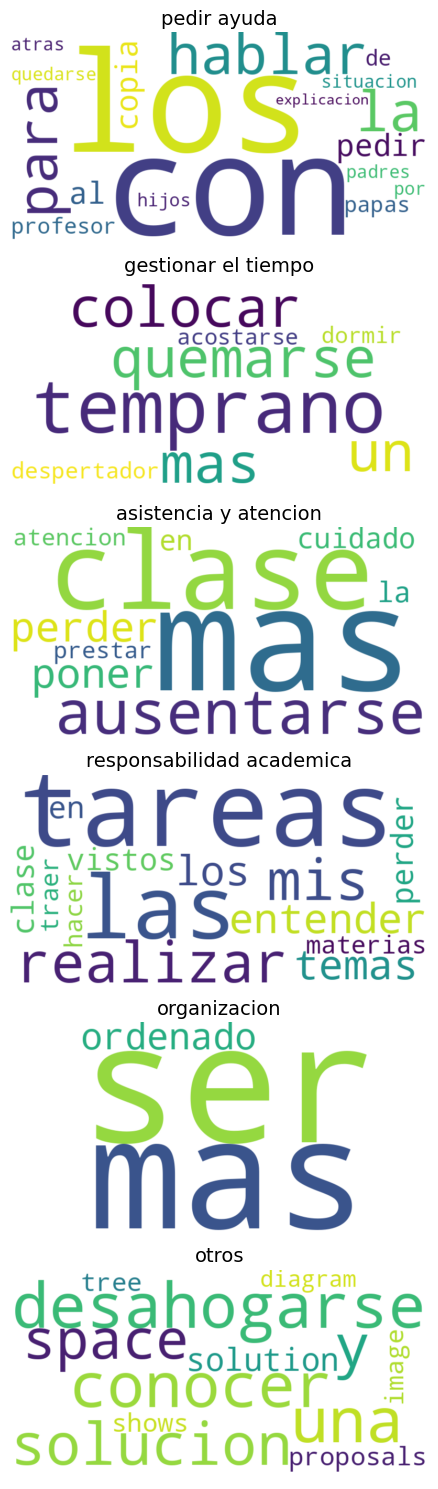

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Diccionario de ejemplo
data = {
    'pedir ayuda': ['pedir copia al profesor', 'hablar con los papas de la situacion para', 'con los hijos para no quedarse atras', 'hablar con los padres', 'por la explicacion'],
    'gestionar el tiempo': ['no quemarse mas', 'colocar un despertador', 'dormir temprano', 'acostarse temprano'],
    'asistencia y atencion': ['no ausentarse mas', 'no perder clases', 'poner cuidado en la clase', 'prestar mas atencion'],
    'responsabilidad academica': ['realizar mis tareas', 'entender los temas vistos en clase', 'no perder materias', 'traer las tareas', 'hacer las tareas'],
    'organizacion': ['ser mas ordenado'],
    'otros': ['desahogarse', 'conocer una solucion', 'y', 'space for solution proposals', 'the image shows a tree diagram']
}

# Configuración de la figura y los ejes
fig, axes = plt.subplots(len(data), 1, figsize=(10, 15), sharex=True, sharey=True)

# Generar una nube de palabras para cada llave y mostrarla
for ax, (key, values) in zip(axes, data.items()):
    # Crear una cadena de texto con los valores
    text = ' '.join(values)

    # Generar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    # Mostrar la nube de palabras en el eje correspondiente
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(key, fontsize=14)
    ax.axis('off')  # No mostrar ejes

# Ajustar el diseño
plt.tight_layout()
plt.show()



In [ ]:
# Ejemplo de uso
def prueba_segmentacion(input_csv, model):
    # Leer el archivo CSV
    df = pd.read_csv(input_csv,encoding='latin-1')

    # Obtener el primer texto de la columna 'PROPUESTAS DE SOLUCION'
    primer_texto = df['PROPUESTAS DE SOLUCION'].iloc[0]

    # Aplicar la función de segmentación
    resultado = segmentar_texto(model, primer_texto)

    print("Texto Original:")
    print(primer_texto)
    print("\nTexto Segmentado:")
    print(resultado)

# Configuración
input_csv = '/content/step1_processed.csv'

# Aquí deberías inicializar `model` con la instancia adecuada para tu API
# Ejemplo: model = YourModelClass()
prueba_segmentacion(input_csv, model)

In [ ]:
def extraer_frases(texto):
    # Dividir el texto en líneas
    lineas = texto.split('\n')

    # Filtrar las líneas que comienzan con "*", ya que contienen las frases
    frases = [linea.strip().replace("* ", "") for linea in lineas if linea.startswith("-")]

    return frases

# Ejemplo de uso
texto = response.text
frases_resultantes = extraer_frases(texto)
print(frases_resultantes)


['peleas', 'mentiras', 'conflictos', 'uso del celular', 'chismes', 'robar', 'uso de apodos']




# Transcription using GEMINI API / Data workflow

---



To learn more about working with the Gemini API, see the [Python tutorial](https://ai.google.dev/tutorials/python_quickstart).

If you're new to generative AI models, you might want to look at the
[concepts guide](https://ai.google.dev/docs/concepts) and the
[Gemini API overview](https://ai.google.dev/docs/gemini_api_overview).

In [ ]:
import PIL.Image

sample_file_1= PIL.Image.open('/content/drive/MyDrive/Encuestas/img210003.jpg')

model = genai.GenerativeModel(model_name="gemini-1.5-flash-001")

prompt = "Transcribe the document"

response = model.generate_content([prompt,  sample_file_1])

Markdown(">" + response.text)

ValueError: Invalid operation: The `response.text` quick accessor requires the response to contain a valid `Part`, but none were returned. Please check the `candidate.safety_ratings` to determine if the response was blocked.

In [ ]:
print(response.text)

HOJA DE TRABAJO ESTACIÓN

Estación No: 2 **Metodología** y **Evaluación** Grado: 6 - 3

PROPUESTAS DE SOLUCIÓN
Prestar atención a los profesores cuando nos explican.

No prestar atención a los profesores
no repasar para los exámenes
Cuando no nos revisan las tareas que hicimos

Cuando no nos explican bien

EFECTOS

PROBLEMA

METODOLOGÍA
Y
EVALUACIÓN

No prestar atención a los profesores
Hablar en clases

CAUSAS


In [ ]:
import json
archivo_json = 'datos15pro.json'

# Exportar los datos como JSON
with open(archivo_json, 'w', encoding='utf-8') as archivo:
    json.dump(response.text, archivo, ensure_ascii=False, indent=4)

print(f"Datos exportados a {archivo_json}")

Datos exportados a datos15pro.json


In [ ]:
import os
import pandas as pd
from PIL import Image
import json
import re
import google.generativeai as genai
from google.colab import userdata

# Function to extract category and grade from the image filename
def extract_category_and_grade(filename):
    base_name = os.path.splitext(filename)[0]
    first_digit = base_name[3]  # First number after 'img'
    second_digit = base_name[4]  # Second number after 'img'

    # Map first_digit to category
    category_map = {
        '1': 'Responsabilidad',
        '2': 'Metodologías de enseñanza y evaluación',
        '3': 'Ausentismo',
        '4': 'Indisciplina',
        '5': 'Inadecuados hábitos de estudio',
        '6': 'Falta de apoyo de la familia'
    }

    category = category_map.get(first_digit, 'Unknown')
    grade = f'Grado: {second_digit}'

    return category, grade

# Function to transcribe text from the image using the provided model
def transcribe_text_from_image(image):
    model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest")
    prompt = "Transcribe the document"
    response = model.generate_content([prompt, image])
    return response.text

# Function to parse the transcribed text into a structured dictionary
def parse_transcribed_text(transcribed_text):
    sections = {
        "PROPUESTAS DE SOLUCIÓN": "",
        "CAUSAS": "",
        "PROBLEMA": "",
        "EFECTOS": "",
    }

    # Regular expressions to match each section
    section_patterns = {
        "PROPUESTAS DE SOLUCIÓN": r"\*\*PROPUESTAS DE SOLUCIÓN\*\*\n([\s\S]*?)(?=\*\*|$)",
        "CAUSAS": r"\*\*CAUSAS\*\*\n([\s\S]*?)(?=\*\*|$)",
        "PROBLEMA": r"\*\*PROBLEMA\*\*\n([\s\S]*?)(?=\*\*CAUSAS|$)",  #r"\*\*PROBLEMA\*\*\n([\s\S]*?)(?=\*\*CAUSAS|$)"  \*\*PROBLEMA\*\*\s*([\s\S]*?)(?=\*\*|$)
        "EFECTOS": r"\*\*EFECTOS\*\*\n([\s\S]*?)(?=\*\*|$)"
    }

    # Extract each section using regex
    for key, pattern in section_patterns.items():
        match = re.search(pattern, transcribed_text)
        if match:
            # Clean up the extracted text (remove bullets and trim whitespace)
            cleaned_text = match.group(1).strip().replace("\n", " ").replace("*", "")
            sections[key] = cleaned_text

    return sections

# Function to save transcribed text to a temporary JSON file
def save_transcription_to_json(transcribed_text, json_path):
    with open(json_path, 'w', encoding='utf-8') as json_file:
        json.dump({"text": transcribed_text}, json_file, ensure_ascii=False, indent=4)

# Function to load transcribed text from JSON file
def load_transcription_from_json(json_path):
    with open(json_path, 'r', encoding='utf-8') as json_file:
        data = json.load(json_file)
    return data["text"]

# Path to the single image you want to test
image_path = '/content/img26001.jpg'
image_filename = os.path.basename(image_path)
json_temp_path = '/content/temp_transcription.json'  # Temporary JSON file path

# Open the image using PIL
sample_file_2 = Image.open(image_path)

# Extract category and grade from the filename
category, grade = extract_category_and_grade(image_filename)

# Transcribe text from the image
transcribed_text = transcribe_text_from_image(sample_file_2)

# Save the transcribed text to a temporary JSON file
save_transcription_to_json(transcribed_text, json_temp_path)

# Load the transcribed text from the JSON file
loaded_text = load_transcription_from_json(json_temp_path)

# Parse the loaded text into a structured dictionary
parsed_text = parse_transcribed_text(loaded_text)

# Store the data in a dictionary
data = {
    'Filename': image_filename,
    'Category': category,
    'Grade': grade,
    'PROPUESTAS DE SOLUCIÓN': parsed_text["PROPUESTAS DE SOLUCIÓN"],
    'CAUSAS': parsed_text["CAUSAS"],
    'PROBLEMA': parsed_text["PROBLEMA"],
    'EFECTOS': parsed_text["EFECTOS"],
}

# Convert the data to a DataFrame
df = pd.DataFrame([data])

# Print the DataFrame to verify the output
print(df)

# Optionally, save the DataFrame to a CSV file for further analysis
output_csv_path = 'single_image_transcribed_data.csv'
df.to_csv(output_csv_path, index=False, encoding='utf-8')

print(f"Data saved to {output_csv_path}")

# Delete the temporary JSON file after processing
if os.path.exists(json_temp_path):
    os.remove(json_temp_path)
    print(f"Temporary JSON file {json_temp_path} deleted.")


       Filename                                Category     Grade  \
0  img26001.jpg  Metodologías de enseñanza y evaluación  Grado: 6   

                              PROPUESTAS DE SOLUCIÓN  \
0   Prestar atención a los profesores cuando nos ...   

                                              CAUSAS  \
0   No prestar atención a los profesores  Hablar ...   

                    PROBLEMA  \
0   METODOLOGÍA Y EVALUACIÓN   

                                             EFECTOS  
0   No repasar para los exámenes  Cuando nos revi...  
Data saved to single_image_transcribed_data.csv
Temporary JSON file /content/temp_transcription.json deleted.


In [ ]:
data

{'Filename': 'img26001.jpg',
 'Category': 'Metodologías de enseñanza y evaluación',
 'Grade': 'Grado: 6',
 'PROPUESTAS DE SOLUCIÓN': ' Prestar atención a los profesores cuando nos explican',
 'CAUSAS': ' No prestar atención a los profesores  Hablar en clases',
 'PROBLEMA': ' METODOLOGÍA Y EVALUACIÓN',
 'EFECTOS': ' No repasar para los exámenes  Cuando nos revisan las tareas que hicimos  '}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
from PIL import Image
import json
import re
import google.generativeai as genai
from google.colab import userdata
import time


images_to_process = [


"img37004.jpg",
"img69011.jpg"


]

# Function to extract category and grade from the image filename
def extract_category_and_grade(filename):
    base_name = os.path.splitext(filename)[0]
    first_digit = base_name[3]  # First number after 'img'
    second_digit = base_name[4]  # Second number after 'img'

    # Map first_digit to category
    category_map = {
        '1': 'Responsabilidad',
        '2': 'Metodologías de enseñanza y evaluación',
        '3': 'Ausentismo',
        '4': 'Indisciplina',
        '5': 'Inadecuados hábitos de estudio',
        '6': 'Falta de apoyo de la familia'
    }

    category = category_map.get(first_digit, 'Unknown')
    grade = f'Grado: {second_digit}'

    return category, grade

# Function to transcribe text from the image using the provided model
def transcribe_text_from_image(image):
    model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest")
    prompt = "Transcribe the document"
    response = model.generate_content([prompt, image])
    return response.text

# Function to parse the transcribed text into a structured dictionary
def parse_transcribed_text(transcribed_text):
    sections = {
        "PROPUESTAS DE SOLUCIÓN": "",
        "CAUSAS": "",
        "PROBLEMA": "",
        "EFECTOS": "",
    }

    # Regular expressions to match each section
    section_patterns = {
        "PROPUESTAS DE SOLUCIÓN": r"\*\*PROPUESTAS DE SOLUCIÓN\*\*\n([\s\S]*?)(?=\*\*|$)",
        "CAUSAS": r"\*\*CAUSAS\*\*\n([\s\S]*?)(?=\*\*|$)",
        "PROBLEMA": r"\*\*PROBLEMA\*\*\n([\s\S]*?)(?=\*\*CAUSAS|$)",
        "EFECTOS": r"\*\*EFECTOS\*\*\n([\s\S]*?)(?=\*\*|$)"
    }

    # Extract each section using regex
    for key, pattern in section_patterns.items():
        match = re.search(pattern, transcribed_text)
        if match:
            # Clean up the extracted text (remove bullets and trim whitespace)
            cleaned_text = match.group(1).strip().replace("\n", " ").replace("*", "")
            sections[key] = cleaned_text

    return sections

# Function to save transcribed text to a temporary JSON file
def save_transcription_to_json(transcribed_text, json_path):
    with open(json_path, 'w', encoding='utf-8') as json_file:
        json.dump({"text": transcribed_text}, json_file, ensure_ascii=False, indent=4)

# Function to load transcribed text from JSON file
def load_transcription_from_json(json_path):
    with open(json_path, 'r', encoding='utf-8') as json_file:
        data = json.load(json_file)
    return data["text"]

# Directory containing all the images
images_dir = '/content/drive/MyDrive/Encuestas'
output_csv_path = 'images_transcribed_data_test11.csv'

# Initialize a list to store all data
all_data = []

# Initialize a counter
image_count = 0

# Process up to 10 images in the directory
for image_filename in images_to_process:

        image_path = os.path.join(images_dir, image_filename)
        json_temp_path = os.path.join(images_dir, f"{os.path.splitext(image_filename)[0]}_temp.json")

        # Open the image using PIL
        image = Image.open(image_path)

        # Extract category and grade from the filename
        category, grade = extract_category_and_grade(image_filename)

        # Transcribe text from the image
        transcribed_text = transcribe_text_from_image(image)

        # Save the transcribed text to a temporary JSON file
        save_transcription_to_json(transcribed_text, json_temp_path)

        # Load the transcribed text from the JSON file
        loaded_text = load_transcription_from_json(json_temp_path)

        # Parse the loaded text into a structured dictionary
        parsed_text = parse_transcribed_text(loaded_text)

        # Store the data in a dictionary
        data = {
            'Filename': image_filename,
            'Category': category,
            'Grade': grade,
            'PROPUESTAS DE SOLUCIÓN': parsed_text["PROPUESTAS DE SOLUCIÓN"],
            'CAUSAS': parsed_text["CAUSAS"],
            'PROBLEMA': parsed_text["PROBLEMA"],
            'EFECTOS': parsed_text["EFECTOS"],
        }

        # Append the data to the list
        all_data.append(data)

        # Delete the temporary JSON file after processing
        if os.path.exists(json_temp_path):
            os.remove(json_temp_path)

        # Increment the counter and check if we've processed 10 images
        #image_count += 1
        time.sleep(7)
        #if image_count >= 10:
        #    break

# Convert all the data to a DataFrame
df = pd.DataFrame(all_data)

# Save the DataFrame to a CSV file
df.to_csv(output_csv_path, index=False, encoding='utf-8')

print(f"Data from 10 images saved to {output_csv_path}")


Data from 10 images saved to images_transcribed_data_test11.csv


In [ ]:
all_data

[{'Filename': 'img27007.jpg',
  'Category': 'Metodologías de enseñanza y evaluación',
  'Grade': 'Grado: 7',
  'PROPUESTAS DE SOLUCIÓN': '',
  'CAUSAS': ' dictan mucho  hablan muy rápido  estamos cuando no nos prestan atención  no nos prestan atención  el salón no... explican  algunos son...  no le echan tinta a los marcadores...  tienen muy rara la letra y no se entiende  la letra no se ve  no les gustan algunas clases',
  'PROBLEMA': ' Metodología y evaluación de los docentes',
  'EFECTOS': ' Que perdemos materias  no les gusta escribir  desanimamos en clases  no entregan tareas'}]

In [ ]:
output_csv_path = 'images_transcribed_data_test10.csv'
df = pd.DataFrame(all_data)

# Save the DataFrame to a CSV file
df.to_csv(output_csv_path, index=False, encoding='utf-8')

In [ ]:
image_filename

'img46006.jpg'

In [ ]:
import pandas as pd
import os

# Rutas
csv_folder_path = '/content/drive/MyDrive/Datos'
output_csv_path = 'final20.csv'
images_folder_path = '/content/drive/MyDrive/Encuestas'

# Cargar todos los archivos CSV en una lista de DataFrames
dfs = []
for file_name in os.listdir(csv_folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(csv_folder_path, file_name)
        try:
            # Intenta leer con utf-8
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            # Si falla, intenta con 'ISO-8859-1'
            df = pd.read_csv(file_path, encoding='ISO-8859-1')
        dfs.append(df)

# Unificar todos los DataFrames en uno solo
combined_df = pd.concat(dfs, ignore_index=True)

# Eliminar las filas donde los 4 campos estén en blanco
filtered_df = combined_df.dropna(subset=['PROPUESTAS DE SOLUCIÓN', 'CAUSAS', 'PROBLEMA', 'EFECTOS'], how='all')

# Definir una función para determinar la fila con mayor cantidad de información y que no contenga '#¿NOMBRE?'
def resolve_duplicates(group):
    # Filtrar las filas que no contengan '#¿NOMBRE?'
    valid_rows = group[~group.astype(str).apply(lambda x: x.str.contains('#¿NOMBRE?')).any(axis=1)]

    # Si existen filas sin '#¿NOMBRE?', selecciona la que tenga más información
    if not valid_rows.empty:
        return valid_rows.loc[valid_rows.notna().sum(axis=1).idxmax()]

    # Si todas las filas contienen '#¿NOMBRE?', selecciona la que tenga más información
    return group.loc[group.notna().sum(axis=1).idxmax()]

# Resolver duplicados basado en la columna 'Filename'
filtered_df = filtered_df.groupby('Filename').apply(resolve_duplicates).reset_index(drop=True)

# Guardar el DataFrame filtrado en un archivo CSV
filtered_df.to_csv(output_csv_path, index=False, encoding='utf-8')

print(f"Archivo unificado guardado en {output_csv_path}")

# Obtener lista de filenames del DataFrame filtrado
filenames_from_csv = filtered_df['Filename'].unique()

# Obtener lista de imágenes en la carpeta
images_in_folder = [file for file in os.listdir(images_folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Extraer nombres de archivo sin extensión para comparación
images_in_folder_names = [os.path.splitext(file)[0] for file in images_in_folder]

# Comparar listas
missing_in_csv = set(images_in_folder_names) - set(filenames_from_csv)

# Imprimir imágenes que están en el directorio original pero no en el archivo CSV
if missing_in_csv:
    print(f"Imágenes en el directorio pero no en el archivo CSV: {missing_in_csv}")
else:
    print("Todas las imágenes del directorio están presentes en el archivo CSV.")


Archivo unificado guardado en final20.csv
Imágenes en el directorio pero no en el archivo CSV: {'img69011', 'img310002', 'img68003', 'img46001', 'img39006', 'img39008', 'img39004', 'img67010', 'img37001', 'img47006', 'img48005', 'img39010', 'img38005', 'img37004', 'img28011', 'img410007', 'img36010', 'img26003', 'img68008', 'img310001', 'img46012', 'img49008', 'img27009', 'img68001', 'img49002', 'img37011', 'img410006', 'img47007', 'img29003', 'img67002', 'img47005', 'img210002', 'img210005', 'img39005', 'img28006', 'img46010', 'img69008', 'img29008', 'img69005', 'img36009', 'img310003', 'img28001', 'img68010', 'img37003', 'img36002', 'img37006', 'img28002', 'img28007', 'img46003', 'img36004', 'img38004', 'img48010', 'img29002', 'img46007', 'img67004', 'img38008', 'img210006', 'img610005', 'img310009', 'img27001', 'img310008', 'img36001', 'img49005', 'img410002', 'img39009', 'img38001', 'img38009', 'img37008', 'img68009', 'img27006', 'img69007', 'img68004', 'img46004', 'img68011', 'img

In [ ]:
file_name

'images_transcribed_data_test (2).csv'

In [ ]:
image_names_with_extension = [name + '.jpg' for name in images_in_folder]

In [ ]:
image_list = [
    'img000001.jpg', 'img000002.jpg', 'img000003.jpg',
    'img210001.jpg', 'img210002.jpg', 'img210004.jpg',
    'img210005.jpg', 'img210006.jpg', 'img210007.jpg',
    'img210008.jpg', 'img210009.jpg', 'img210010.jpg',
    'img26001.jpg', 'img26002.jpg', 'img26003.jpg',
    'img26004.jpg', 'img26005.jpg', 'img26006.jpg',
    'img26007.jpg', 'img26008.jpg', 'img26009.jpg',
    'img26010.jpg', 'img26011.jpg', 'img26012.jpg',
    'img26013.jpg', 'img27001.jpg', 'img27002.jpg',
    'img27003.jpg', 'img27004.jpg', 'img27005.jpg',
    'img27006.jpg', 'img27008.jpg', 'img27009.jpg',
    'img28001.jpg', 'img28002.jpg', 'img28003.jpg',
    'img28004.jpg', 'img28005.jpg', 'img28006.jpg',
    'img28007.jpg', 'img28009.jpg', 'img28010.jpg',
    'img28011.jpg', 'img29001.jpg', 'img29002.jpg',
    'img29003.jpg', 'img29004.jpg', 'img29005.jpg',
    'img29006.jpg', 'img29007.jpg', 'img29008.jpg',
    'img310001.jpg', 'img310004.jpg', 'img310005.jpg',
    'img310006.jpg', 'img310007.jpg', 'img310008.jpg',
    'img310009.jpg', 'img36001.jpg', 'img36002.jpg',
    'img36003.jpg', 'img36004.jpg', 'img36005.jpg',
    'img36006.jpg', 'img36007.jpg', 'img36008.jpg',
    'img36009.jpg', 'img36010.jpg', 'img36011.jpg',
    'img37001.jpg', 'img37002.jpg', 'img37003.jpg',
    'img37005.jpg', 'img37006.jpg', 'img37007.jpg',
    'img37008.jpg', 'img37009.jpg', 'img37010.jpg',
    'img37011.jpg', 'img37012.jpg', 'img38001.jpg',
    'img38002.jpg', 'img38003.jpg', 'img38004.jpg',
    'img38005.jpg', 'img38006.jpg', 'img38007.jpg',
    'img38009.jpg', 'img38010.jpg', 'img38011.jpg',
    'img39001.jpg', 'img39002.jpg', 'img39003.jpg',
    'img39004.jpg', 'img39006.jpg', 'img39007.jpg',
    'img39009.jpg', 'img39010.jpg', 'img410001.jpg',
    'img410002.jpg', 'img410003.jpg', 'img410004.jpg',
    'img410005.jpg', 'img410006.jpg', 'img410007.jpg',
    'img410008.jpg', 'img46001.jpg', 'img46002.jpg',
    'img46003.jpg', 'img46004.jpg', 'img46005.jpg',
    'img46006.jpg', 'img46007.jpg', 'img46008.jpg',
    'img46009.jpg', 'img46010.jpg', 'img46011.jpg',
    'img46012.jpg', 'img47001.jpg', 'img47002.jpg',
    'img47003.jpg', 'img47004.jpg', 'img47005.jpg',
    'img47006.jpg', 'img47007.jpg', 'img47008.jpg',
    'img47009.jpg', 'img48001.jpg', 'img48002.jpg',
    'img48003.jpg', 'img48004.jpg', 'img48005.jpg',
    'img48006.jpg', 'img48008.jpg', 'img48009.jpg',
    'img48010.jpg', 'img48011.jpg', 'img49001.jpg',
    'img49002.jpg', 'img49003.jpg', 'img49004.jpg',
    'img49005.jpg', 'img49006.jpg', 'img49007.jpg',
    'img49008.jpg', 'img610001.jpg', 'img610002.jpg',
    'img610004.jpg', 'img610006.jpg', 'img610007.jpg',
    'img67001.jpg', 'img67003.jpg', 'img67004.jpg',
    'img67005.jpg', 'img67006.jpg', 'img67007.jpg',
    'img67008.jpg', 'img67009.jpg', 'img67011.jpg',
    'img67012.jpg', 'img68001.jpg', 'img68002.jpg',
    'img68003.jpg', 'img68004.jpg', 'img68005.jpg',
    'img68006.jpg', 'img68007.jpg', 'img68008.jpg',
    'img68009.jpg', 'img68010.jpg', 'img68011.jpg',
    'img69001.jpg', 'img69003.jpg', 'img69004.jpg',
    'img69005.jpg', 'img69006.jpg', 'img69007.jpg',
    'img69008.jpg', 'img69010.jpg'
]


In [ ]:
set_first_list = set(image_list)
set_second_list = set(images_in_folder)

# Encontrar diferencia
difference = set_second_list - set_first_list
print(sorted(difference))

['img210003.jpg', 'img27007.jpg', 'img28008.jpg', 'img310002.jpg', 'img310003.jpg', 'img37004.jpg', 'img38008.jpg', 'img39005.jpg', 'img39008.jpg', 'img48007.jpg', 'img610003.jpg', 'img610005.jpg', 'img610008.jpg', 'img67002.jpg', 'img67010.jpg', 'img69002.jpg', 'img69009.jpg', 'img69011.jpg']


In [ ]:
print(len(difference))

18


In [ ]:
'img210003.jpg'

# Processing data

In [ ]:
!pip install pandas matplotlib seaborn plotly scikit-learn umap-learn nltk transformers wordcloud
!pip install chardet

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk
import transformers
import wordcloud
import chardet
import re

In [ ]:
# Leer una porción del archivo para determinar la codificación
with open('/content/final20.csv', 'rb') as file:
    resultado = chardet.detect(file.read(10000))  # Leer los primeros 10 KB
    print(resultado)

{'encoding': 'Windows-1252', 'confidence': 0.7249588951002959, 'language': ''}


In fact, the codification that wored best for me was latin-1

In [ ]:
# Cargar el archivo CSV especificando la codificación adecuada
df = pd.read_csv('/content/final20.csv', encoding='latin-1')

# Función para limpiar y estandarizar el texto
def limpiar_texto(texto):
    # Reemplazar caracteres problemáticos y estandarizar delimitadores
    texto = re.sub(r'[-_]+', '. ', texto)  # Reemplazar guiones y guiones bajos con un punto y un espacio
    texto = re.sub(r'\s+', ' ', texto)  # Eliminar espacios adicionales
    texto = re.sub(r'[^\w\s,.]', '', texto)  # Eliminar caracteres especiales no deseados
    texto = texto.strip().lower()  # Eliminar espacios iniciales/finales y convertir a minúsculas
    return texto

# Aplicar la limpieza a todas las columnas relevantes
columnas_a_limpiar = ['PROPUESTAS DE SOLUCION', 'CAUSAS', 'PROBLEMA', 'EFECTOS']
for columna in columnas_a_limpiar:
    df[columna] = df[columna].apply(lambda x: limpiar_texto(str(x)))

# Mostrar una vista previa de los datos
df.head()


,Filename,Category,Grade,PROPUESTAS DE SOLUCION,CAUSAS,PROBLEMA,EFECTOS,Unnamed: 7
0,img000001.jpg,Indisciplina,Grado:8,"alejarse de las personas que no aportan, habla...","andan en el chisme, hablan en clases, el rendi...",indisciplina.,"expulsion, suspension, la disciplina es muy ba...",NaN
1,img210003.jpg,Metodologias de enseñanza y evaluacion,Grado: 10,1. que los estudiantes pongamos de nuestra par...,1. porque hay clases en las que no le entendem...,metodologia y evaluacion.,"perder el año, perdemos las materias, perdemos...",NaN
2,img000003.jpg,Falta de apoyo de la familia,Grado: 10,hacer charlas con los padres e hijos sobre la ...,"que algunos padres trabajen, tienen responsabi...","malos entendidos con los padres, conflictos a ...","mala concentracion, problemas con el comportam...",NaN
3,img210001.jpg,Metodologias de enseñanza y evaluacion,Grado: 1,. probar diferentes metodos de enseñanza.,. dictan rapido.,. metodologia y evaluacion utilizada por los d...,nan,NaN
4,img210002.jpg,Metodologias de enseñanza y evaluacion,Grado: 1,ser mas,llevar,metodologia y evaluacion utilizada por los doc...,que uno pueda ir mal,NaN


In [ ]:
df["Grade"].unique()

array(['Grado:8', 'Grado: 10', 'Grado: 1', 'Grado: 6', 'Grado: 7',
       'Grado: 8', 'Grado: 9'], dtype=object)

In [ ]:
def limpiar_grado(texto):
    # Extraer solo el número
    numero = texto.replace('Grado:', '').strip()

    # Reemplazar el 1 por 10
    if numero == '1':
        return '10'
    return numero

# Aplicar la función a la columna "Grade"
df['Grade'] = df['Grade'].apply(limpiar_grado)

In [ ]:
df=df.drop(['Filename','Unnamed: 7'],axis=1)
df.head(10)


,Category,Grade,PROPUESTAS DE SOLUCION,CAUSAS,PROBLEMA,EFECTOS
0,Indisciplina,8,"alejarse de las personas que no aportan, habla...","andan en el chisme, hablan en clases, el rendi...",indisciplina.,"expulsion, suspension, la disciplina es muy ba..."
1,Metodologias de enseñanza y evaluacion,10,1. que los estudiantes pongamos de nuestra par...,1. porque hay clases en las que no le entendem...,metodologia y evaluacion.,"perder el año, perdemos las materias, perdemos..."
2,Falta de apoyo de la familia,10,hacer charlas con los padres e hijos sobre la ...,"que algunos padres trabajen, tienen responsabi...","malos entendidos con los padres, conflictos a ...","mala concentracion, problemas con el comportam..."
3,Metodologias de enseñanza y evaluacion,10,. probar diferentes metodos de enseñanza.,. dictan rapido.,. metodologia y evaluacion utilizada por los d...,nan
4,Metodologias de enseñanza y evaluacion,10,ser mas,llevar,metodologia y evaluacion utilizada por los doc...,que uno pueda ir mal
5,Metodologias de enseñanza y evaluacion,10,"que las clases sean mas dinamicas, como estudi...",que no explican bien. que hacen evaluaciones i...,metodologia y evaluacion utilizada por los doc...,nan
6,Metodologias de enseñanza y evaluacion,10,nan,desactualizacion en la evaluacion objetividad ...,problema a solucionar metodologia y evaluacion...,nan
7,Metodologias de enseñanza y evaluacion,10,"poner orden, clases mas dinamicas que no dejen...",bajo rendimiento academico desmotivacion indis...,metodologia y evaluacion utilizada por los doc...,nan
8,Metodologias de enseñanza y evaluacion,10,. proponer retroalimentacion de las clases par...,. profesores que llaman la atencion sin ningãº...,. metodologia y evaluacion.,. mal desempeño. . perdida de examenes. . dece...
9,Metodologias de enseñanza y evaluacion,10,que los profesores se tomen el tiempo de expli...,. . . perder el año baja autoestima bajo rend...,nan,nan


In [ ]:
output=df.to_csv('step1_processed.csv',index=False)

In [ ]:
df = pd.read_csv('/content/step1_processed.csv', encoding='latin-1')

In [ ]:
df.head()

,Category,Grade,PROPUESTAS DE SOLUCION,CAUSAS,PROBLEMA,EFECTOS
0,Indisciplina,8,"alejarse de las personas que no aportan, habla...","andan en el chisme, hablan en clases, el rendi...",indisciplina.,"expulsion, suspension, la disciplina es muy ba..."
1,Metodologias de enseñanza y evaluacion,10,que los estudiantes pongamos de nuestra parte...,porque hay clases en las que no le entendemos...,metodologia y evaluacion.,"perder el año, perdemos las materias, perdemos..."
2,Falta de apoyo de la familia,10,hacer charlas con los padres e hijos sobre la ...,"que algunos padres trabajen, tienen responsabi...","malos entendidos con los padres, conflictos a ...","mala concentracion, problemas con el comportam..."
3,Metodologias de enseñanza y evaluacion,10,. probar diferentes metodos de enseñanza.,. dictan rapido.,. metodologia y evaluacion utilizada por los d...,NaN
4,Metodologias de enseñanza y evaluacion,10,ser mas,llevar,metodologia y evaluacion utilizada por los doc...,que uno pueda ir mal


I created some graphs to enhance the understanding the distribution of the information

<ipython-input-14-a0eebf1dae63>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette=category_colors)


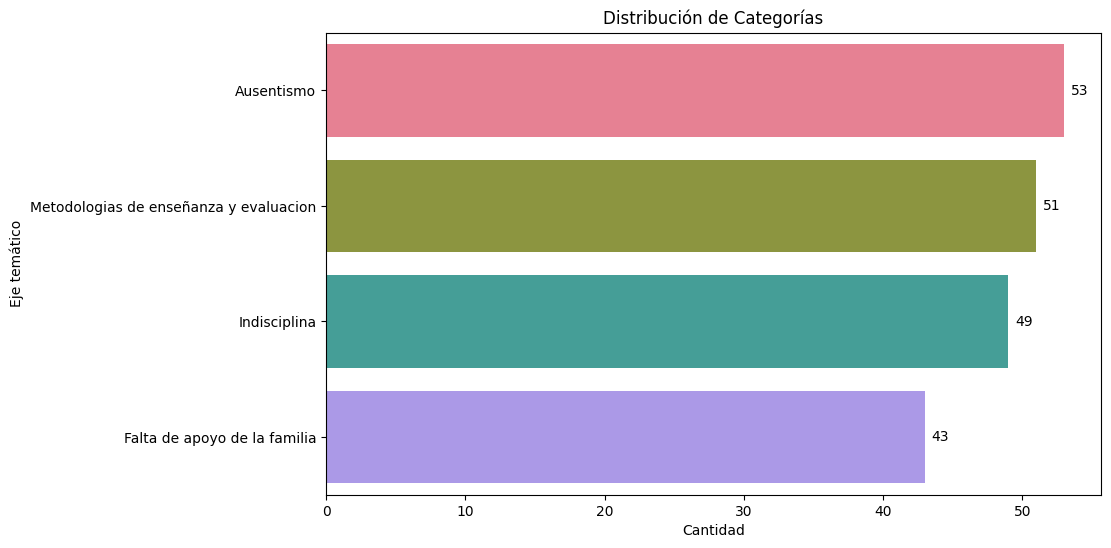

<ipython-input-14-a0eebf1dae63>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Grade', data=df, order=grade_order, palette=grade_colors)


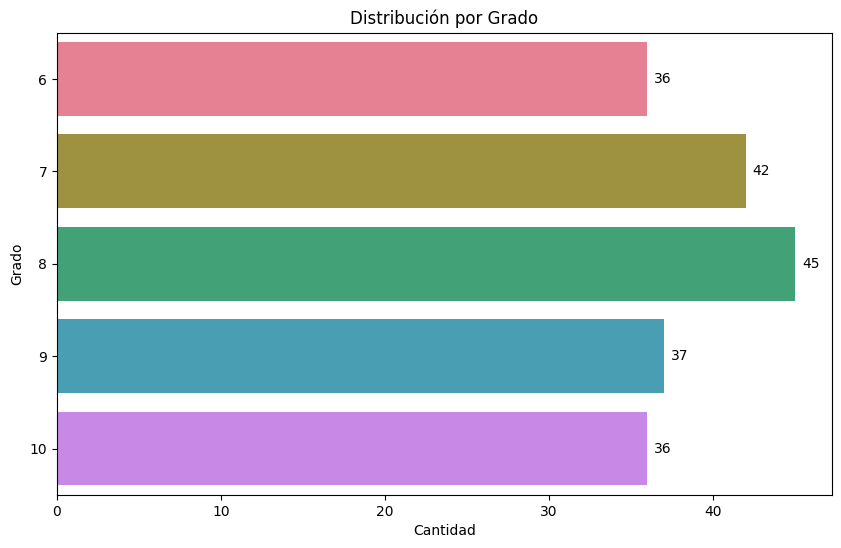

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta de colores para las categorías
category_colors = sns.color_palette("husl", df['Category'].nunique())

# Gráfico de barras de la distribución de categorías
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette=category_colors)

# Añadir las cuentas a la derecha de cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=5, fmt='%d')  # fmt='%d' formatea como enteros

plt.title('Distribución de Categorías')
plt.xlabel('Cantidad')
plt.ylabel('Eje temático')
plt.show()

# Paleta de colores para los grados
grade_colors = sns.color_palette("husl", df['Grade'].nunique())

# Ordenar los grados de forma creciente
grade_order = sorted(df['Grade'].unique())

# Gráfico de barras de la distribución por grado
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Grade', data=df, order=grade_order, palette=grade_colors)

# Añadir las cuentas a la derecha de cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=5, fmt='%d')

plt.title('Distribución por Grado')
plt.xlabel('Cantidad')
plt.ylabel('Grado')
plt.show()


In [ ]:
import re

# Función para limpiar y estandarizar puntos dobles o triples
def limpiar_puntos_dobles(texto):
    # Reemplazar puntos triples o más por un solo punto
    texto = re.sub(r'\.{3,}', '.', texto)
    # Reemplazar puntos dobles por un solo punto
    texto = re.sub(r'\.{2}', '.', texto)
    return texto

# Aplicar esta limpieza a las columnas relevantes
columnas_a_limpiar = ['PROPUESTAS DE SOLUCION', 'CAUSAS', 'PROBLEMA', 'EFECTOS']
for columna in columnas_a_limpiar:
    df[columna] = df[columna].apply(lambda x: limpiar_puntos_dobles(str(x)))

# Verificar los resultados
df.head()


,Category,Grade,PROPUESTAS DE SOLUCION,CAUSAS,PROBLEMA,EFECTOS
0,Indisciplina,8,"alejarse de las personas que no aportan, habla...","andan en el chisme, hablan en clases, el rendi...",indisciplina.,"expulsion, suspension, la disciplina es muy ba..."
1,Metodologias de enseñanza y evaluacion,10,que los estudiantes pongamos de nuestra parte...,porque hay clases en las que no le entendemos...,metodologia y evaluacion.,"perder el año, perdemos las materias, perdemos..."
2,Falta de apoyo de la familia,10,hacer charlas con los padres e hijos sobre la ...,"que algunos padres trabajen, tienen responsabi...","malos entendidos con los padres, conflictos a ...","mala concentracion, problemas con el comportam..."
3,Metodologias de enseñanza y evaluacion,10,. probar diferentes metodos de enseñanza.,. dictan rapido.,. metodologia y evaluacion utilizada por los d...,nan
4,Metodologias de enseñanza y evaluacion,10,ser mas,llevar,metodologia y evaluacion utilizada por los doc...,que uno pueda ir mal


In [ ]:
def dividir_frases(texto):
    frases = re.split(r'[,.]', texto)  # Dividir en base a comas y puntos
    frases = [frase.strip() for frase in frases if frase.strip()]  # Eliminar espacios y frases vacías
    return frases

# Aplicar la función para separar frases en todas las columnas relevantes
for columna in columnas_a_limpiar:
    df[columna + '_frases'] = df[columna].apply(dividir_frases)

# Mostrar una vista previa de las frases separadas
df.head()

,Category,Grade,PROPUESTAS DE SOLUCION,CAUSAS,PROBLEMA,EFECTOS,PROPUESTAS DE SOLUCION_frases,CAUSAS_frases,PROBLEMA_frases,EFECTOS_frases
0,Indisciplina,8,"alejarse de las personas que no aportan, habla...","andan en el chisme, hablan en clases, el rendi...",indisciplina.,"expulsion, suspension, la disciplina es muy ba...","[alejarse de las personas que no aportan, habl...","[andan en el chisme, hablan en clases, el rend...",[indisciplina],"[expulsion, suspension, la disciplina es muy b..."
1,Metodologias de enseñanza y evaluacion,10,que los estudiantes pongamos de nuestra parte...,porque hay clases en las que no le entendemos...,metodologia y evaluacion.,"perder el año, perdemos las materias, perdemos...",[que los estudiantes pongamos de nuestra parte...,[porque hay clases en las que no le entendemos...,[metodologia y evaluacion],"[perder el año, perdemos las materias, perdemo..."
2,Falta de apoyo de la familia,10,hacer charlas con los padres e hijos sobre la ...,"que algunos padres trabajen, tienen responsabi...","malos entendidos con los padres, conflictos a ...","mala concentracion, problemas con el comportam...",[hacer charlas con los padres e hijos sobre la...,"[que algunos padres trabajen, tienen responsab...","[malos entendidos con los padres, conflictos a...","[mala concentracion, problemas con el comporta..."
3,Metodologias de enseñanza y evaluacion,10,. probar diferentes metodos de enseñanza.,. dictan rapido.,. metodologia y evaluacion utilizada por los d...,nan,[probar diferentes metodos de enseñanza],[dictan rapido],[metodologia y evaluacion utilizada por los do...,[nan]
4,Metodologias de enseñanza y evaluacion,10,ser mas,llevar,metodologia y evaluacion utilizada por los doc...,que uno pueda ir mal,[ser mas],[llevar],[metodologia y evaluacion utilizada por los do...,[que uno pueda ir mal]


In [ ]:
output=df.to_csv('step2_processed.csv',index=False)

# Using language models

Since I already had the phrases, I wanted the know the most repeated topics in order to start working towards a strategy. First, I tried spacy.

In [ ]:
#Installing
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 69.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#Load the csv
df = pd.read_csv('/content/step2_processed.csv', encoding='latin-1')

In [ ]:
import pandas as pd
import spacy
from collections import Counter
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go

# Cargar modelo de spaCy en español
nlp = spacy.load('es_core_news_sm')

# Función para preprocesar el texto y extraer palabras clave
def obtener_palabras_clave(texto):
    doc = nlp(texto)
    palabras_clave = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return palabras_clave

# Función para obtener el resumen de palabras clave por grado y categoría
def resumir_por_grado_categoria(df, columna):
    resumenes = {}
    for (grado, categoria), grupo in df.groupby(['Grade', 'Category']):
        palabras_clave = []
        for texto in grupo[columna]:
            palabras_clave += obtener_palabras_clave(texto)
        resumenes[(grado, categoria)] = Counter(palabras_clave).most_common(20)  # Top 20 palabras clave
    return resumenes

# Aplicar el resumen por cada columna de interés
resumenes_propuestas = resumir_por_grado_categoria(df, 'PROPUESTAS DE SOLUCION_frases')
resumenes_causas = resumir_por_grado_categoria(df, 'CAUSAS_frases')
resumenes_problemas = resumir_por_grado_categoria(df, 'PROBLEMA_frases')
resumenes_efectos = resumir_por_grado_categoria(df, 'EFECTOS_frases')


In [ ]:
resumenes_efectos

{(6, 'Ausentismo'): [('perder', 8),
  ('nar', 5),
  ('atrasado', 4),
  ('materia', 4),
  ('quedar él', 3),
  ('examen', 2),
  ('falta', 2),
  ('prestar', 2),
  ('tarea', 1),
  ('cuaderno', 1),
  ('aprendizaje', 1),
  ('ritmo', 1),
  ('entendimiento', 1),
  ('dificultad', 1),
  ('academico', 1),
  ('acostar él', 1),
  ('bulling', 1),
  ('querer', 1),
  ('escuela', 1),
  ('perecer', 1)],
 (6, 'Indisciplina'): [('observador', 4),
  ('compaã±ero', 4),
  ('perder', 3),
  ('nar', 3),
  ('clase', 3),
  ('anotar', 2),
  ('prestar', 2),
  ('atencion', 2),
  ('comportamiento', 2),
  ('compaÃ±ero', 2),
  ('conflicto', 2),
  ('anotacion', 2),
  ('pelea', 2),
  ('bullying', 2),
  ('irrespetar', 2),
  ('demas', 2),
  ('profesor', 2),
  ('cior', 1),
  ('llamar', 1),
  ('tarea', 1)],
 (6, 'Metodologias de enseÃ±anza y evaluacion'): [('nar', 6),
  ('niÃ±os', 5),
  ('tarea', 3),
  ('poder', 3),
  ('perder', 3),
  ('salon', 2),
  ('vacio', 2),
  ('profesor', 2),
  ('repasar', 1),
  ('examen', 1),
  ('rev

As you can see, spacy is only able to tokenize the words and determine how many times each word is repeated. Maybe in another context it is a useful function but in this case it was not the most appropriate.

In [ ]:
import spacy
import pandas as pd

# Cargar el modelo en español
nlp = spacy.load('es_core_news_sm')

# Función para procesar y extraer las frases más relevantes
def extraer_frases_relevantes(frases):
    frases_procesadas = []
    for frase in frases:
        doc = nlp(frase)
        # Identificar frases con sustantivos importantes y eliminar redundancias
        frases_procesadas.append(' '.join([token.text for token in doc if token.pos_ in ['NOUN', 'VERB', 'ADJ']]))
    return frases_procesadas

# Aplicar la función a las columnas relevantes
for columna in ['PROPUESTAS DE SOLUCION_frases', 'CAUSAS_frases', 'PROBLEMA_frases', 'EFECTOS_frases']:
    df[columna + '_procesado'] = df[columna].apply(extraer_frases_relevantes)

df.head()


,Category,Grade,PROPUESTAS DE SOLUCION,CAUSAS,PROBLEMA,EFECTOS,PROPUESTAS DE SOLUCION_frases,CAUSAS_frases,PROBLEMA_frases,EFECTOS_frases,PROPUESTAS DE SOLUCION_frases_procesado,CAUSAS_frases_procesado,PROBLEMA_frases_procesado,EFECTOS_frases_procesado
0,Indisciplina,8,"alejarse de las personas que no aportan, habla...","andan en el chisme, hablan en clases, el rendi...",indisciplina.,"expulsion, suspension, la disciplina es muy ba...","['alejarse de las personas que no aportan', 'h...","['andan en el chisme', 'hablan en clases', 'el...",['indisciplina'],"['expulsion', 'suspension', 'la disciplina es ...","[, , , , , , , , , , , d, , , , , , , , , , , ...","[, , , n, d, , n, , , n, , , , , c, h, , , , ,...","[, , , n, d, , , c, , , , , n, , , ]]","[, , , , , , , , , , n, , , , , , , , , , n, ,..."
1,Metodologias de enseÃ±anza y evaluacion,10,que los estudiantes pongamos de nuestra parte...,porque hay clases en las que no le entendemos...,metodologia y evaluacion.,"perder el aÃ±o, perdemos las materias, perdemo...",['que los estudiantes pongamos de nuestra part...,['porque hay clases en las que no le entendemo...,['metodologia y evaluacion'],"['perder el aÃ±o', 'perdemos las materias', 'p...","[, , , , , , , , , , , , , , d, , , n, , , , ,...","[, , , , , , , , , h, , , , c, , , , , , , , n...","[, , , , , , d, , , , , , , , , , , , , , , , ...","[, , , , , d, , , , , , , , Ã, , , , , , , , ,..."
2,Falta de apoyo de la familia,10,hacer charlas con los padres e hijos sobre la ...,"que algunos padres trabajen, tienen responsabi...","malos entendidos con los padres, conflictos a ...","mala concentracion, problemas con el comportam...",['hacer charlas con los padres e hijos sobre l...,"['que algunos padres trabajen', 'tienen respon...","['malos entendidos con los padres', 'conflicto...","['mala concentracion', 'problemas con el compo...","[, , h, , c, , , , c, h, , , , , , , c, , n, ,...","[, , , , , , , , , , n, , , , , , d, , , , , ,...","[, , , , , , , , , n, , , n, d, , d, , , , c, ...","[, , , , , , , c, , n, c, , n, , , , c, , , n,..."
3,Metodologias de enseÃ±anza y evaluacion,10,. probar diferentes metodos de enseÃ±anza.,. dictan rapido.,. metodologia y evaluacion utilizada por los d...,NaN,['probar diferentes metodos de enseÃ±anza'],['dictan rapido'],['metodologia y evaluacion utilizada por los d...,['nan'],"[, , , , , , , , , d, , , , , , n, , , , , , ,...","[, , d, , c, , , n, , , , , , d, , , ]]","[, , , , , , d, , , , , , , , , , , , , , , , ...","[, , n, , n, , ]]"
4,Metodologias de enseÃ±anza y evaluacion,10,ser mas,llevar,metodologia y evaluacion utilizada por los doc...,que uno pueda ir mal,['ser mas'],['llevar'],['metodologia y evaluacion utilizada por los d...,['que uno pueda ir mal'],"[, , , , , , , , , , ]]","[, , , , , , , , , ]]","[, , , , , , d, , , , , , , , , , , , , , , , ...","[, , , , , , , n, , , , , , d, , , , , , , , ,..."


In [ ]:
from transformers import pipeline

# Cargar un modelo preentrenado para resumen
resumidor = pipeline('summarization', model='facebook/bart-large-cnn')

# Función para condensar información con un LLM
def resumir_frases(frases):
    texto = ' '.join(frases)
    resumen = resumidor(texto[:1000], max_length=50, min_length=25, do_sample=False)[0]['summary_text']
    return resumen

# Aplicar la función de resumen a las columnas de frases
for columna in ['PROPUESTAS DE SOLUCION_frases', 'CAUSAS_frases', 'PROBLEMA_frases', 'EFECTOS_frases']:
    df[columna + '_resumen'] = df[columna].apply(resumir_frases)

df.head()


Your max_length is set to 50, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 50, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 50, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)
Your max_length is set to 50, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_leng

,Category,Grade,PROPUESTAS DE SOLUCION,CAUSAS,PROBLEMA,EFECTOS,PROPUESTAS DE SOLUCION_frases,CAUSAS_frases,PROBLEMA_frases,EFECTOS_frases,PROPUESTAS DE SOLUCION_frases_procesado,CAUSAS_frases_procesado,PROBLEMA_frases_procesado,EFECTOS_frases_procesado,PROPUESTAS DE SOLUCION_frases_resumen,CAUSAS_frases_resumen,PROBLEMA_frases_resumen,EFECTOS_frases_resumen
0,Indisciplina,8,"alejarse de las personas que no aportan, habla...","andan en el chisme, hablan en clases, el rendi...",indisciplina.,"expulsion, suspension, la disciplina es muy ba...","['alejarse de las personas que no aportan', 'h...","['andan en el chisme', 'hablan en clases', 'el...",['indisciplina'],"['expulsion', 'suspension', 'la disciplina es ...","[, , , , , , , , , , , d, , , , , , , , , , , ...","[, , , n, d, , n, , , n, , , , , c, h, , , , ,...","[, , , n, d, , , c, , , , , n, , , ]]","[, , , , , , , , , , n, , , , , , , , , , n, ,...",'A l e j a r s e d l a s p e r s o n a s...,"' a n d a n e n e l c h i s m e ' , ' ...",' i n d i s c i p l i n a ' is a set of words ...,"' e x p u l s i o n ' , ' s u s p e n s a..."
1,Metodologias de enseÃ±anza y evaluacion,10,que los estudiantes pongamos de nuestra parte...,porque hay clases en las que no le entendemos...,metodologia y evaluacion.,"perder el aÃ±o, perdemos las materias, perdemo...",['que los estudiantes pongamos de nuestra part...,['porque hay clases en las que no le entendemo...,['metodologia y evaluacion'],"['perder el aÃ±o', 'perdemos las materias', 'p...","[, , , , , , , , , , , , , , d, , , n, , , , ,...","[, , , , , , , , , h, , , , c, , , , , , , , n...","[, , , , , , d, , , , , , , , , , , , , , , , ...","[, , , , , d, , , , , , , , Ã, , , , , , , , ,...",' q u e l o s e s t u d i a n t e s' ' p o...,' p o r q u e h a y c l a s e s e n l ...,' m e t o d o l o g i a y e v a l u a c i ...,"' p e r d e r e l a Ã ± o ' , ' p er d e..."
2,Falta de apoyo de la familia,10,hacer charlas con los padres e hijos sobre la ...,"que algunos padres trabajen, tienen responsabi...","malos entendidos con los padres, conflictos a ...","mala concentracion, problemas con el comportam...",['hacer charlas con los padres e hijos sobre l...,"['que algunos padres trabajen', 'tienen respon...","['malos entendidos con los padres', 'conflicto...","['mala concentracion', 'problemas con el compo...","[, , h, , c, , , , c, h, , , , , , , c, , n, ,...","[, , , , , , , , , , n, , , , , , d, , , , , ,...","[, , , , , , , , , n, , , n, d, , d, , , , c, ...","[, , , , , , , c, , n, c, , n, , , , c, , , n,...",' h a c e r c h a r l a s' is a line from th...,' q u e a l g u n o s p a d r e s t r a ...,' m a l o s e n t e n d i d o s' ' c o n f l...,"' m a l a c o n c e n t r a c i o n ' , ' ..."
3,Metodologias de enseÃ±anza y evaluacion,10,. probar diferentes metodos de enseÃ±anza.,. dictan rapido.,. metodologia y evaluacion utilizada por los d...,NaN,['probar diferentes metodos de enseÃ±anza'],['dictan rapido'],['metodologia y evaluacion utilizada por los d...,['nan'],"[, , , , , , , , , d, , , , , , n, , , , , , ,...","[, , d, , c, , , n, , , , , , d, , , ]]","[, , , , , , d, , , , , , , , , , , , , , , , ...","[, , n, , n, , ]]",' p r o b a r d i f e r e n t e s m e t o ...,' d i c t a n r a p i d o ' is the name of a...,' m e t o d o l o g i a y e v a l u a c i ...,' n a n ' ' n a ' n ' is a set of letters used...
4,Metodologias de enseÃ±anza y evaluacion,10,ser mas,llevar,metodologia y evaluacion utilizada por los doc...,que uno pueda ir mal,['ser mas'],['llevar'],['metodologia y evaluacion utilizada por los d...,['que uno pueda ir mal'],"[, , , , , , , , , , ]]","[, , , , , , , , , ]]","[, , , , , , d, , , , , , , , , , , , , , , , ...","[, , , , , , , n, , , , , , d, , , , , , , , ,...",' s e r m a s ' is an acronym for the word ...,'L' l e v a r ' is a word for 'lucky' in Engli...,' m s' means 'm' or 'e' in Latin. ' m' is the ...,' q u e u n o p u e d a i r m a l '


In [ ]:
output=df.to_csv('step4_summary.csv',index=False)

Analisis tematico

In [ ]:
import spacy
import pandas as pd
import ast

# Cargar el modelo en español
nlp = spacy.load('es_core_news_sm')

# Lista de columnas de frases que queremos preprocesar
columnas_frases = ['PROPUESTAS DE SOLUCION_frases', 'CAUSAS_frases', 'PROBLEMA_frases', 'EFECTOS_frases']

# Función para lematizar y limpiar el texto
def preprocesar_texto(texto):
    # Paso 1: Verificar si el texto es una cadena
    if isinstance(texto, str):
        # Paso 2: Verificar si es una lista representada como cadena
        if texto.startswith('[') and texto.endswith(']'):
            try:
                texto = ast.literal_eval(texto)  # Convertir la cadena en una lista real
            except Exception as e:
                print(f"Error al convertir a lista: {e}")
                return []  # Retornar lista vacía en caso de error
        else:
            texto = [texto]  # Si no es una lista, lo convierte en una lista de un solo elemento

        # Paso 3: Procesar cada frase en la lista
        frases_procesadas = []
        for frase in texto:
            # Paso 4: Procesar con Spacy
            try:
                doc = nlp(frase)
                tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
                frases_procesadas.append(' '.join(tokens))
            except Exception as e:
                print(f"Error al procesar la frase '{frase}': {e}")

        return frases_procesadas
    else:
        # Si el texto no es una cadena, retornar lista vacía
        return []

# Cargar el CSV en un DataFrame
#df = pd.read_csv('tu_archivo.csv')  # Reemplaza 'tu_archivo.csv' con el nombre de tu archivo CSV

# Aplicar preprocesamiento a las columnas de frases
for columna in columnas_frases:
    df[columna + '_procesado'] = df[columna].apply(preprocesar_texto)

# Mostrar las primeras filas del dataframe procesado
df.head()

# Opcional: guardar el DataFrame procesado en un nuevo CSV
#df.to_csv('tu_archivo_procesado.csv', index=False)


,Category,Grade,PROPUESTAS DE SOLUCION,CAUSAS,PROBLEMA,EFECTOS,PROPUESTAS DE SOLUCION_frases,CAUSAS_frases,PROBLEMA_frases,EFECTOS_frases,PROPUESTAS DE SOLUCION_frases_procesado,CAUSAS_frases_procesado,PROBLEMA_frases_procesado,EFECTOS_frases_procesado
0,Indisciplina,8,"alejarse de las personas que no aportan, habla...","andan en el chisme, hablan en clases, el rendi...",indisciplina.,"expulsion, suspension, la disciplina es muy ba...","[alejarse de las personas que no aportan, habl...","[andan en el chisme, hablan en clases, el rend...",[indisciplina],"[expulsion, suspension, la disciplina es muy b...",[],[],[],[]
1,Metodologias de enseñanza y evaluacion,10,que los estudiantes pongamos de nuestra parte...,porque hay clases en las que no le entendemos...,metodologia y evaluacion.,"perder el año, perdemos las materias, perdemos...",[que los estudiantes pongamos de nuestra parte...,[porque hay clases en las que no le entendemos...,[metodologia y evaluacion],"[perder el año, perdemos las materias, perdemo...",[],[],[],[]
2,Falta de apoyo de la familia,10,hacer charlas con los padres e hijos sobre la ...,"que algunos padres trabajen, tienen responsabi...","malos entendidos con los padres, conflictos a ...","mala concentracion, problemas con el comportam...",[hacer charlas con los padres e hijos sobre la...,"[que algunos padres trabajen, tienen responsab...","[malos entendidos con los padres, conflictos a...","[mala concentracion, problemas con el comporta...",[],[],[],[]
3,Metodologias de enseñanza y evaluacion,10,. probar diferentes metodos de enseñanza.,. dictan rapido.,. metodologia y evaluacion utilizada por los d...,nan,[probar diferentes metodos de enseñanza],[dictan rapido],[metodologia y evaluacion utilizada por los do...,[nan],[],[],[],[]
4,Metodologias de enseñanza y evaluacion,10,ser mas,llevar,metodologia y evaluacion utilizada por los doc...,que uno pueda ir mal,[ser mas],[llevar],[metodologia y evaluacion utilizada por los do...,[que uno pueda ir mal],[],[],[],[]


## Bert/summarize

Here I am using bert to summarize the information previously grouped by category and grade

In [ ]:
output=df.to_csv('step2_processed.csv',index=False)

In [ ]:
# Combinar todas las frases en una lista para cada fila
df['frases_combinadas'] = df.apply(lambda row: row['PROPUESTAS DE SOLUCION_frases'] +
                                               row['CAUSAS_frases'] +
                                               row['PROBLEMA_frases'] +
                                               row['EFECTOS_frases'], axis=1)

# Mostrar la estructura final
df[['Category', 'Grade', 'frases_combinadas']].head()


,Category,Grade,frases_combinadas
0,Indisciplina,8,"[alejarse de las personas que no aportan, habl..."
1,Metodologias de enseñanza y evaluacion,10,[que los estudiantes pongamos de nuestra parte...
2,Falta de apoyo de la familia,10,[hacer charlas con los padres e hijos sobre la...
3,Metodologias de enseñanza y evaluacion,10,"[probar diferentes metodos de enseñanza, dicta..."
4,Metodologias de enseñanza y evaluacion,10,"[ser mas, llevar, metodologia y evaluacion uti..."


In [ ]:
from transformers import pipeline

# Cargar un pipeline de LLM
resumidor = pipeline('summarization', model='facebook/bart-large-cnn')

# Generar un resumen para cada fila basado en las frases combinadas
df['resumen'] = df['frases_combinadas'].apply(lambda frases: resumidor(' '.join(frases[:1000]))[0]['summary_text'])

# Mostrar los resúmenes generados
df[['Filename', 'Category', 'Grade', 'resumen']].head()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Your max_length is set to 142, but your input_length is only 70. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=35)
Your max_length is set to 142, but your input_length is only 137. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=68)
Your max_length is set to 142, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)
Your max_length is set to 142, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)
You

KeyError: "['Filename'] not in index"

In [ ]:
df[['Category', 'Grade', 'resumen']].head()

,Category,Grade,resumen
0,Indisciplina,8,El rendimiento academico baja indisciplina exp...
1,Metodologias de enseñanza y evaluacion,10,Estudiantes pongamos de nuestra parte para emp...
2,Falta de apoyo de la familia,10,Hijos no prestan atencion a sus hijos estan ma...
3,Metodologias de enseñanza y evaluacion,10,Probar diferentes metodos de enseñanza dictan ...
4,Metodologias de enseñanza y evaluacion,10,a. ser mas mas llevar metodologia y evaluacion...


In [ ]:
output=df[['Category', 'Grade', 'resumen']].to_csv('step3_summary.csv',index=False)

## SPACY, TRANSLATION, NLTK

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Descargar recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

def dividir_frases_y_palabras(texto):
    # Dividir en oraciones
    oraciones = sent_tokenize(texto)

    # Lista para guardar las frases y palabras con sentido
    frases_con_sentido = []

    # Palabras vacías en español (stopwords)
    stop_words = set(stopwords.words('spanish'))

    for oracion in oraciones:
        palabras = word_tokenize(oracion)
        # Filtrar las palabras vacías y unir términos clave
        palabras_clave = [palabra for palabra in palabras if palabra.lower() not in stop_words]

        # Unir las palabras clave en frases con sentido
        frase_con_sentido = ' '.join(palabras_clave)
        frases_con_sentido.append(frase_con_sentido)

    return frases_con_sentido




['bajo rendimiento académico desmotivación indisciplina']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Ejemplo de uso
texto = 'bajo rendimiento académico desmotivación indisciplina'
frases_resultantes = dividir_frases_y_palabras(texto)
print(frases_resultantes)

['bajo rendimiento académico desmotivación indisciplina']


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Descargar recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

def dividir_frases_y_palabras(texto):
    # Palabras vacías en español (stopwords)
    stop_words = set(stopwords.words('spanish'))

    # Tokenizar en palabras
    palabras = word_tokenize(texto)

    # Filtrar palabras vacías y mantener solo palabras clave
    palabras_clave = [palabra for palabra in palabras if palabra.lower() not in stop_words]

    # Unir palabras que tengan sentido en conjunto
    frases_con_sentido = ', '.join(palabras_clave)

    return frases_con_sentido

# Ejemplo de uso



bajo, rendimiento, académico, desmotivación, indisciplina


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
texto = 'bajo rendimiento académico desmotivación indisciplina'
frases_resultantes = dividir_frases_y_palabras(texto)
print(frases_resultantes)

bajo, rendimiento, académico, desmotivación, indisciplina


In [ ]:
! pip install spacy googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=a0534931aeabcfa52def810d47153dbf8bad22a51233c190aa92356a2801423b
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:


In [ ]:
!pip install transformers

In [ ]:
import torch
from transformers import MarianMTModel, MarianTokenizer
import spacy

# Cargar el modelo en inglés de spaCy
nlp_en = spacy.load("en_core_web_sm")

# Cargar los modelos de traducción de MarianMT
tokenizer_es_en = MarianTokenizer.from_pretrained('Helsinki-NLP/opus-mt-es-en')
model_es_en = MarianMTModel.from_pretrained('Helsinki-NLP/opus-mt-es-en')

tokenizer_en_es = MarianTokenizer.from_pretrained('Helsinki-NLP/opus-mt-en-es')
model_en_es = MarianMTModel.from_pretrained('Helsinki-NLP/opus-mt-en-es')

def traducir(texto, tokenizer, model):
    # Traducción usando MarianMT
    translated = model.generate(**tokenizer(texto, return_tensors="pt", padding=True, truncation=True))
    return tokenizer.decode(translated[0], skip_special_tokens=True)

def extraer_frases_con_sentido(texto):
    # Traducir el texto al inglés
    texto_en = traducir(texto, tokenizer_es_en, model_es_en)

    # Procesar el texto en inglés usando spaCy
    doc = nlp_en(texto_en)

    # Lista para almacenar las frases con sentido en inglés
    frases_con_sentido_en = []

    # Detectar frases basadas en sintaxis y entidades en inglés
    for chunk in doc.noun_chunks:
        frases_con_sentido_en.append(chunk.text)

    # Extraer también palabras individuales que no fueron agrupadas en frases
    palabras_restantes_en = [token.text for token in doc if not token.is_stop and not token.is_punct and token.text not in frases_con_sentido_en]

    # Combinar las frases con sentido y las palabras individuales en inglés
    resultado_en = frases_con_sentido_en + palabras_restantes_en

    # Traducir las frases y palabras de vuelta al español
    resultado_es = [traducir(frase, tokenizer_en_es, model_en_es) for frase in resultado_en]

    # Unir los resultados finales en una cadena separada por comas
    return ', '.join(resultado_es)

# Ejemplo de uso
texto = 'bajo rendimiento académico desmotivación indisciplina'
frases_resultantes = extraer_frases_con_sentido(texto)
print(frases_resultantes)



bajo rendimiento académico desmotivación, baja, académica, rendimiento, desmotivación, indisciplina


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

def segmentar_texto_con_t5(texto):
    # Cargar el modelo y tokenizer T5 preentrenado
    tokenizer = T5Tokenizer.from_pretrained("t5-small")
    model = T5ForConditionalGeneration.from_pretrained("t5-small")

    # Preparar el texto para la tarea de segmentación
    entrada = "segment text: " + texto

    # Tokenizar y generar la salida
    inputs = tokenizer.encode(entrada, return_tensors="pt", max_length=512, truncation=True)
    outputs = model.generate(inputs, max_length=512, num_beams=4, early_stopping=True)

    # Decodificar la salida generada
    resultado = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return resultado

# Ejemplo de uso
texto = 'bajo rendimiento académico desmotivación indisciplina'
frases_resultantes = segmentar_texto_con_t5(texto)
print(frases_resultantes)


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

True


In [ ]:
def traducir(texto, tokenizer, model):
    # Traducción usando MarianMT
    translated = model.generate(**tokenizer(texto, return_tensors="pt", padding=True, truncation=True))
    return tokenizer.decode(translated[0], skip_special_tokens=True)

In [ ]:
texto = 'bajo rendimiento académico desmotivación indisciplina'
frases_resultantes = segmentar_texto_con_t5(texto_en)
print(frases_resultantes)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


True


In [ ]:
 texto_en = traducir(texto, tokenizer_es_en, model_es_en)

In [ ]:
texto_en

'low academic performance demotivation indiscipline'

## OPENIA GPT

In [ ]:
!pip install sentence-transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: h11
    Found existing installation: h11 0.9.0
    Uninstalling h11-0.9.0:
      Successfully uninstalled h11-0.9.0
  Attempting uninstall: httpcore
    Found existing installation: httpcore 0.9.1
    Uninstalling httpcore-0.9.1:
      Successfully uninstalled httpcore-0.9.1
  Attempting uninstall: httpx
    Found existing installation: httpx 0.13.3
    Uninstalling httpx-0.13.3:
      Successfully uninstalled httpx-0.13.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following d

In [ ]:
from google.colab import userdata

OPENAI_API=userdata.get('OPENAI_API_KEY')

In [ ]:
import openai
from transformers import MarianMTModel, MarianTokenizer

import os
from openai import OpenAI

client = OpenAI(
    # This is the default and can be omitted
    api_key=OPENAI_API,
)

# Modelos de traducción MarianMT
tokenizer_es_en = MarianTokenizer.from_pretrained('Helsinki-NLP/opus-mt-es-en')
model_es_en = MarianMTModel.from_pretrained('Helsinki-NLP/opus-mt-es-en')

tokenizer_en_es = MarianTokenizer.from_pretrained('Helsinki-NLP/opus-mt-en-es')
model_en_es = MarianMTModel.from_pretrained('Helsinki-NLP/opus-mt-en-es')

def traducir(texto, tokenizer, model):
    translated = model.generate(**tokenizer(texto, return_tensors="pt", padding=True))
    return tokenizer.decode(translated[0], skip_special_tokens=True)

def segmentar_con_gpt(texto):
    # Traducir el texto al inglés
    texto_en = traducir(texto, tokenizer_es_en, model_es_en)

    # Usar GPT-3.5 o GPT-4 para segmentar el texto
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",  # O "gpt-4" si tienes acceso
        messages=[
            {"role": "system", "content": "You are an assistant that segments text into meaningful phrases."},
            {"role": "user", "content": f"Segment the following text into meaningful phrases:\n\n'{texto_en}'"}
        ],
        max_tokens=150,
        temperature=0.3
    )


    # Obtener la respuesta de GPT y traducirla al español
    segmentado_en = response['choices'][0]['message']['content'].strip()
    segmentado_es = traducir(segmentado_en, tokenizer_en_es, model_en_es)

    return segmentado_es


# Ejemplo de uso
texto = 'bajo rendimiento académico desmotivación indisciplina'
frases_resultantes = segmentar_con_gpt(texto)
print(frases_resultantes)


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}